In [ ]:
!pip3 install scikit-learn --upgrade
!pip3 install pandas --upgrade
!pip3 install numpy --upgrade
!pip3 install matplotlib --upgrade
!pip3 install plotly --upgrade
!pip3 install seaborn --upgrade
!pip3 install nltk --upgrade
!pip3 install umap-learn --upgrade

!pip3 install gensim --upgrade
!pip3 install tensorflow --upgrade
!pip3 install keras --upgrade

!pip3 install ollama --upgrade
!pip3 install langchain --upgrade
!pip3 install langchain_community --upgrade
!pip3 install langchain_core --upgrade
!pip3 install beautifulsoup4 --upgrade
!pip3 install chromadb --upgrade
!pip3 install gradio --upgrade

In [2]:
#Download ollama
!curl -fsSL https://ollama.com/install.sh | sh
import subprocess
process = subprocess.Popen("ollama serve", shell=True) #runs on a different thread

>>> Installing ollama to /usr/local
>>> Downloading Linux amd64 bundle
############################################################################################# 100.0%
>>> Creating ollama user...
>>> Adding ollama user to video group...
>>> Adding current user to ollama group...
>>> Creating ollama systemd service...
>>> The Ollama API is now available at 127.0.0.1:11434.
>>> Install complete. Run "ollama" from the command line.


In [ ]:
#Download model llama 3.2
!ollama pull llama3.2

In [ ]:
#Download model llama 3.2:1b
!ollama pull llama3.2:1b

In [ ]:
#Download model llava-phi3
!ollama pull llava-phi3

# Data Mining Lab 2
In this lab session we will focus on the use of Neural Word Embeddings and exploring some basic open source LLMs' applications to data.

## Table of Contents
1. Data preparation
2. Feature engineering
3. Model
4. Results evaluation
5. Other things you could try
6. Deep Learning
7. Word to Vector
8. Clustering
9. High-dimension Visualization
10. Large Language Models (LLMs)


### Necessary Library Requirements:

#### Same as Lab1 except PAMI:
- [Jupyter](http://jupyter.org/) (Strongly recommended but not required)
    - Install via `pip3 install jupyter` and use `jupyter notebook` in terminal to run
- [Scikit Learn](http://scikit-learn.org/stable/index.html)
    - Install via `pip3 install scikit-learn` from a terminal
- [Pandas](http://pandas.pydata.org/)
    - Install via `pip3 install pandas` from a terminal
- [Numpy](http://www.numpy.org/)
    - Install via `pip3 install numpy` from a terminal
- [Matplotlib](https://matplotlib.org/)
    - Install via `pip3 install maplotlib` from a terminal
- [Plotly](https://plot.ly/)
    - Install via `pip3 install plotly` from a terminal
- [Seaborn](https://seaborn.pydata.org/)
    - Install via `pip3 install seaborn`
- [NLTK](http://www.nltk.org/)
    - Install via `pip3 install nltk` from a terminal
- [UMAP](https://umap-learn.readthedocs.io/en/latest/)
    - Install via `pip3 install umap-learn` from a terminal
    

#### New Libraries to install:
- [Gensim](https://pypi.org/project/gensim/)
    - Install via `pip3 install gensim`

- [tensorflow](https://www.tensorflow.org/)
    - Install via `pip3 install tensorflow`
    - Also install `pip3 install tensorflow-hub`

- [Keras](https://keras.io/)
    - Install via `pip3 install keras`

- [Ollama](https://ollama.com)
    - Install via `pip3 install ollama`

- [langchain](https://www.langchain.com)
    - Install via `pip3 install langchain`
    - Also install `pip3 install langchain_community`
    - Also install `pip3 install langchain_core`
    
- [beautifulsoup4](https://pypi.org/project/beautifulsoup4/)
    - Install via `pip3 install beautifulsoup4`
    
- [chromadb](https://www.trychroma.com)
    - Install via `pip3 install chromadb`
    
- [gradio](https://www.gradio.app)
    - Install via `pip3 install gradio`
    
#### Open-source LLMs to install:
- ollama run llama3.2
- ollama run llama3.2:1b  (optional if the first one is too big)
- ollama run llava-phi3

---
## Introduction

**Dataset:** [SemEval 2017 Task](https://competitions.codalab.org/competitions/16380)

**Task:** Classify text data into 4 different emotions using word embeddings and other deep information retrieval approaches.

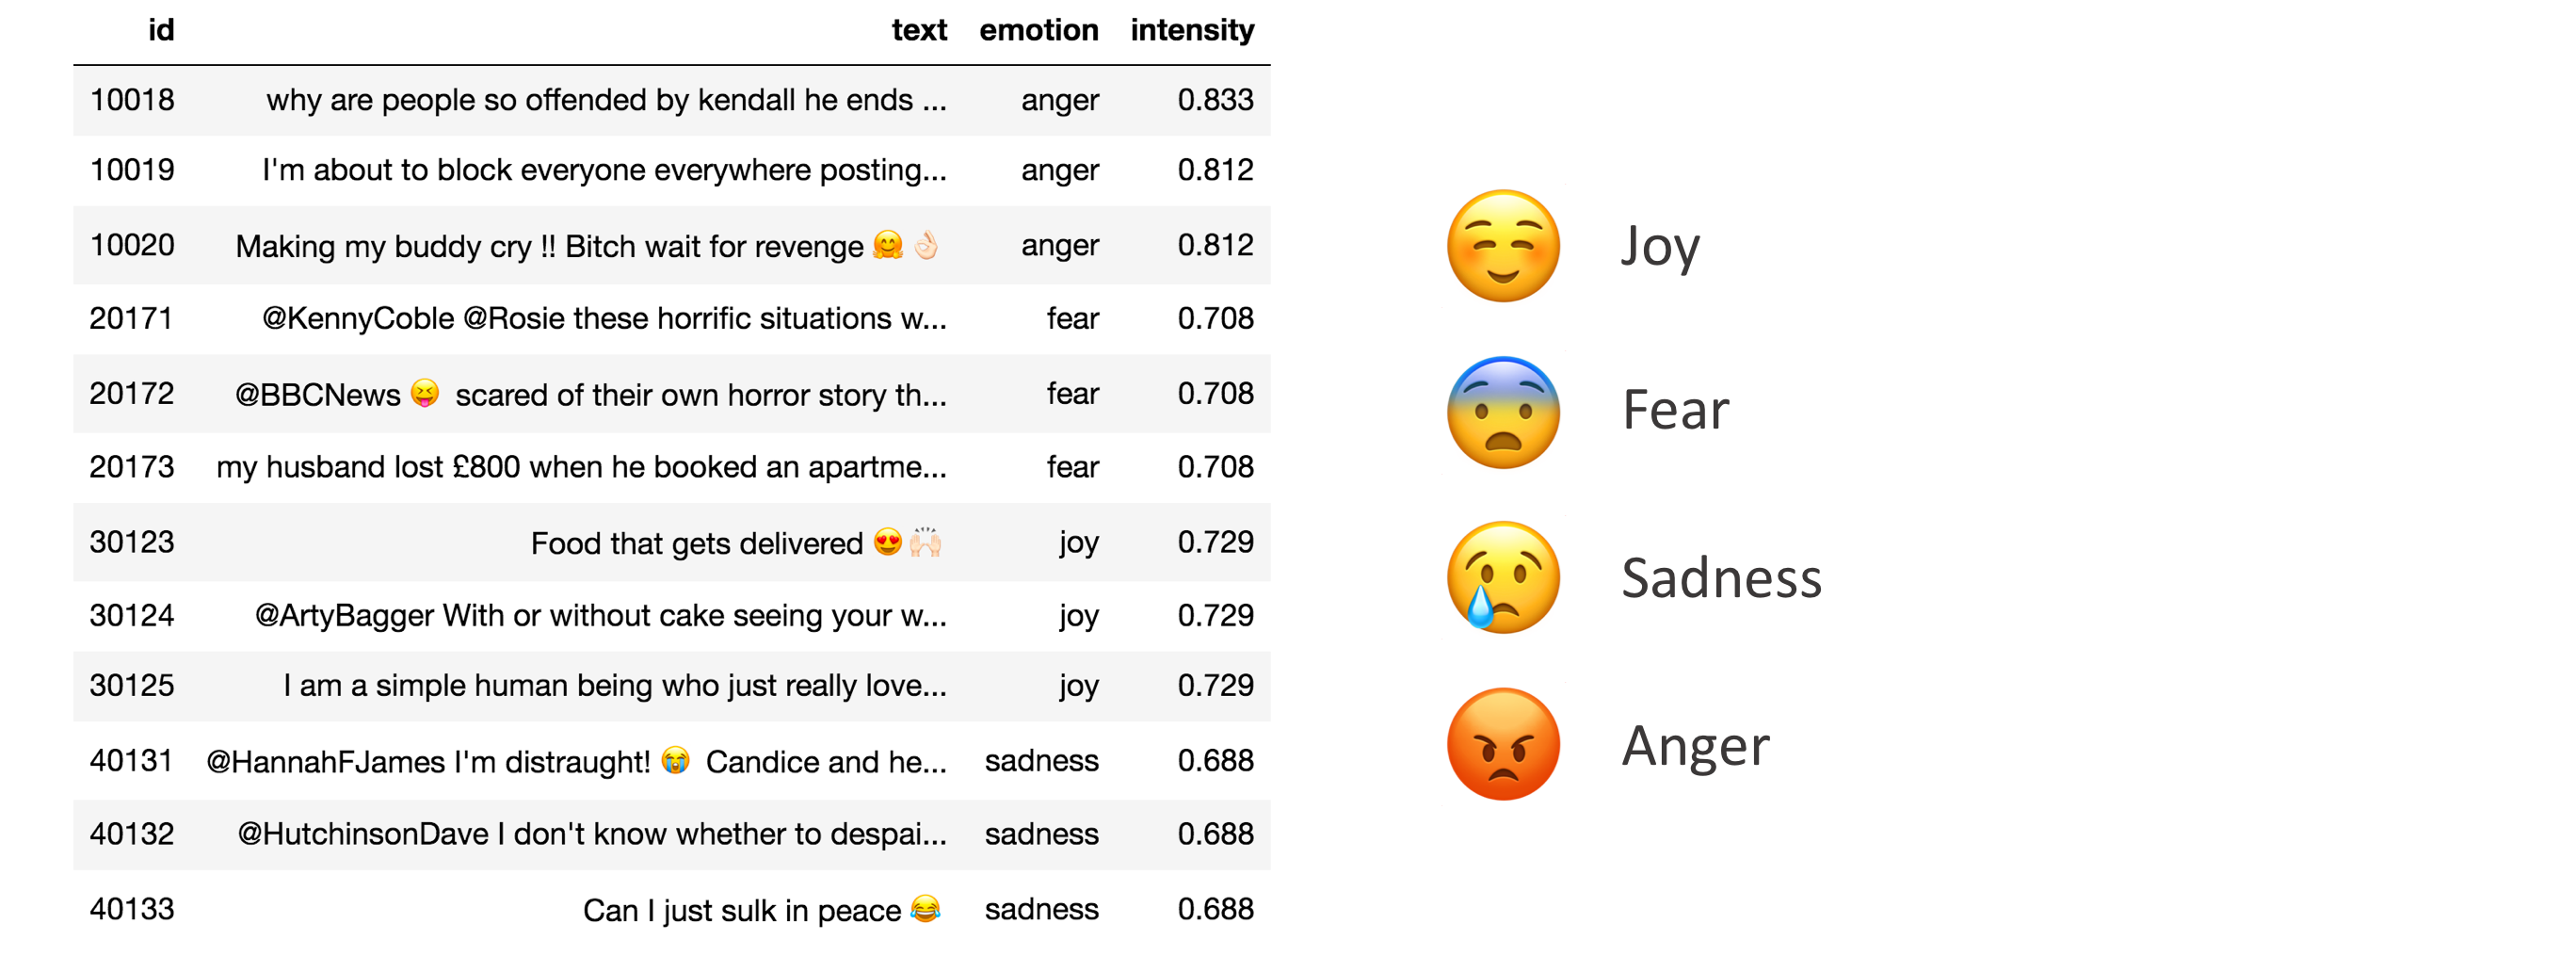

---
## 1. Data Preparation

Before beggining the lab, please make sure to download the [Google News Dataset](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit) and place it in a folder named "GoogleNews" in the same directory as this file.

## 1.1 Load data

We start by loading the csv files into a single pandas dataframe for training and one for testing.

In [ ]:
import pandas as pd

### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [ ]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [ ]:
### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

id                                               text emotion  intensity
0  10000  How the fu*k! Who the heck! moved my fridge!.....   anger      0.938
1  10001  So my Indian Uber driver just called someone t...   anger      0.896
2  10002  @DPD_UK I asked for my parcel to be delivered ...   anger      0.896
3  10003  so ef whichever butt wipe pulled the fire alar...   anger      0.896
4  10004  Don't join @BTCare they put the phone down on ...   anger      0.896

In [ ]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

In [ ]:
print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


---
### ** >>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


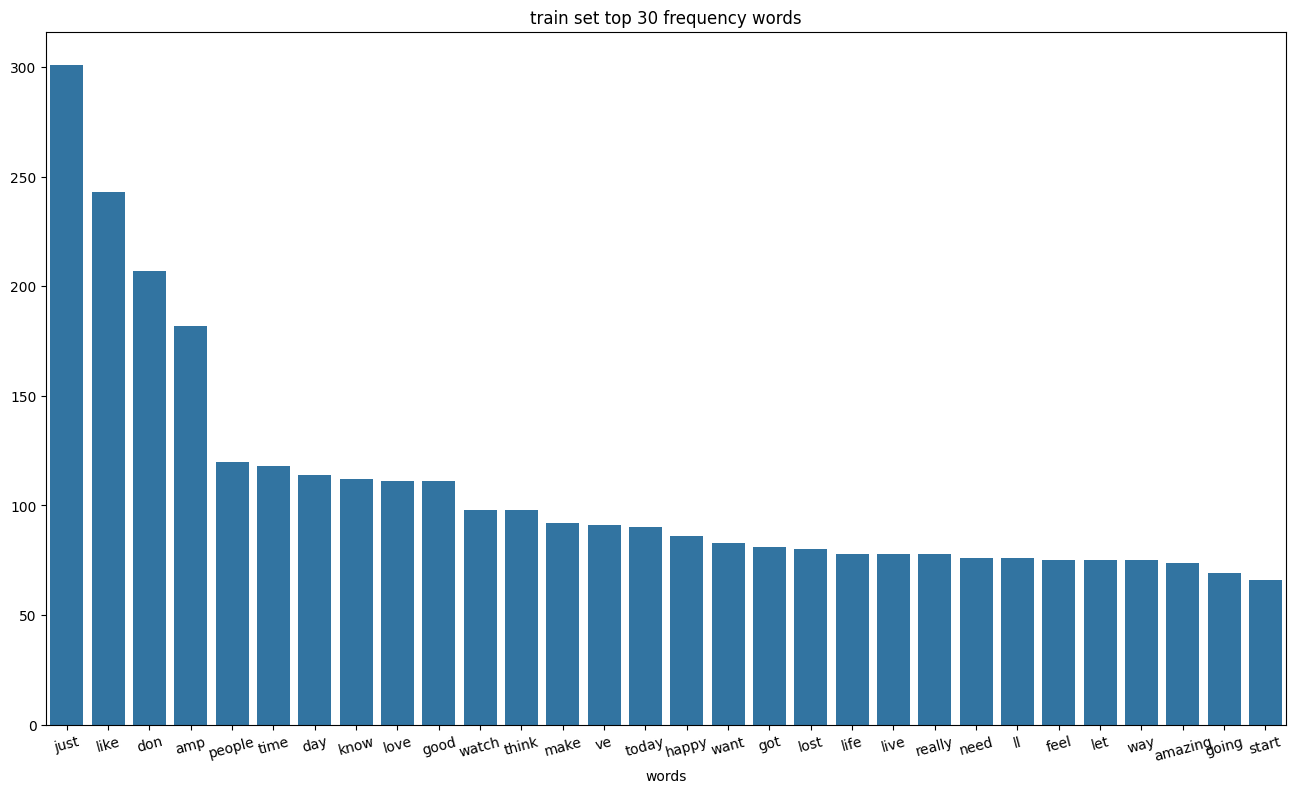

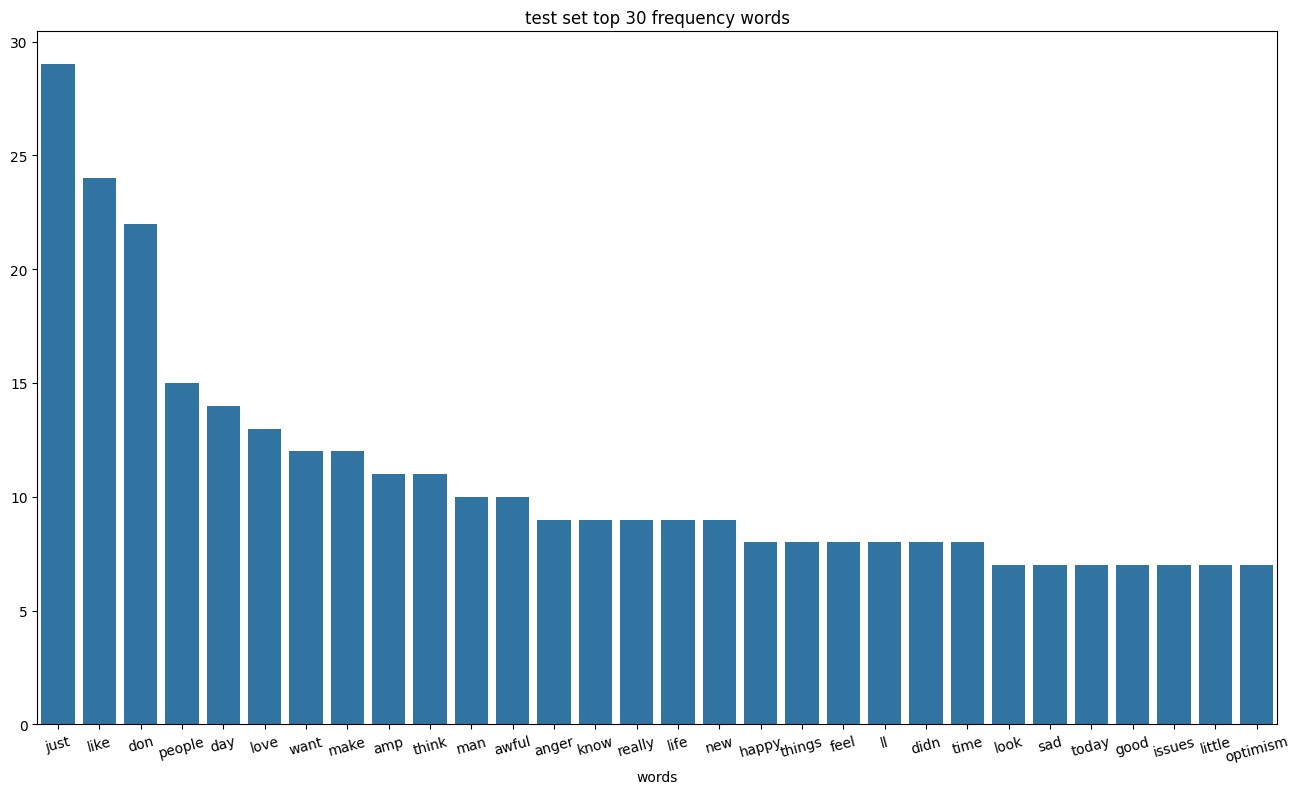

In [ ]:
# Answer here
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns

# 稀疏矩陣要記得toarray()
x_count=CountVectorizer(stop_words='english')
bow_train=x_count.fit_transform(train_df["text"])
feature_train=x_count.get_feature_names_out()
bow_train=pd.DataFrame(bow_train.toarray(),columns=feature_train)


temp=bow_train.sum(axis=0).sort_values(ascending=False)
temp=temp.nlargest(30)
plt.figure(figsize=(16,9))
plt.title("train set top 30 frequency words")
sns.barplot(x=temp.index,y=temp.values)
plt.xlabel("words")
plt.xticks(rotation=15)
plt.show()

bow_test=x_count.transform(test_df["text"])
feature_test=x_count.get_feature_names_out()
bow_test=pd.DataFrame(bow_test.toarray(),columns=feature_test)

temp=bow_test.sum(axis=0).sort_values(ascending=False)
temp=temp.nlargest(30)
plt.figure(figsize=(16,9))
plt.title("test set top 30 frequency words")
sns.barplot(x=temp.index,y=temp.values)
plt.xlabel("words")
plt.xticks(rotation=15)
plt.show()


---
### 1.2 Save data

We will save our data in Pickle format. The pickle module implements binary protocols for serializing and de-serializing a Python object structure.   
  
Some advantages for using pickle structure:  
* Because it stores the attribute type, it's more convenient for cross-platform use.  
* When your data is huge, it could use less space to store also consume less loading time.   

In [ ]:
## save to pickle file
train_df.to_pickle("train_df.pkl")
test_df.to_pickle("test_df.pkl")

In [ ]:
import pandas as pd

## load a pickle file
train_df = pd.read_pickle("train_df.pkl")
test_df = pd.read_pickle("test_df.pkl")

For more information: https://reurl.cc/0Dzqx

---
### 1.3 Exploratory data analysis (EDA)

Again, before getting our hands dirty, we need to explore a little bit and understand the data we're dealing with.

In [ ]:
# group to find distribution
train_df.groupby(['emotion']).count()['text']

emotion
anger       857
fear       1147
joy         823
sadness     786
Name: text, dtype: int64

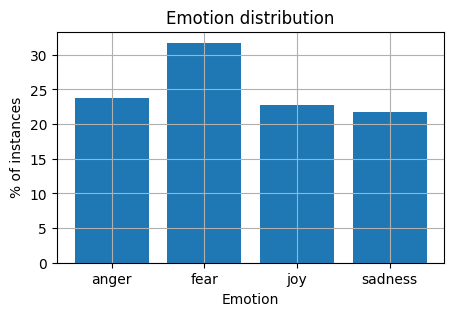

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# the histogram of the data
labels = train_df['emotion'].unique()
post_total = len(train_df)
df1 = train_df.groupby(['emotion']).count()['text']
df1 = df1.apply(lambda x: round(x*100/post_total,3))

#plot
fig, ax = plt.subplots(figsize=(5,3))
plt.bar(df1.index,df1.values)

#arrange
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.title('Emotion distribution')
plt.grid(True)
plt.show()

---

## 2. Feature engineering
### Using Bag of Words
Using scikit-learn ```CountVectorizer``` perform word frequency and use these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# build analyzers (bag-of-words)
BOW_vectorizer = CountVectorizer()

In [ ]:
# 1. Learn a vocabulary dictionary of all tokens in the raw documents.
BOW_vectorizer.fit(train_df['text'])

# 2. Transform documents to document-term matrix.
train_data_BOW_features = BOW_vectorizer.transform(train_df['text'])
test_data_BOW_features = BOW_vectorizer.transform(test_df['text'])

In [ ]:
# check the result
train_data_BOW_features

<3613x10115 sparse matrix of type '<class 'numpy.int64'>'
	with 51467 stored elements in Compressed Sparse Row format>

In [ ]:
type(train_data_BOW_features)

scipy.sparse._csr.csr_matrix

In [ ]:
# add .toarray() to show
train_data_BOW_features.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [ ]:
# check the dimension
train_data_BOW_features.shape

(3613, 10115)

In [ ]:
# observe some feature names
feature_names = BOW_vectorizer.get_feature_names_out()
feature_names[100:110]

array(['2k17', '2much', '2nd', '30', '300', '301', '30am', '30pm', '30s',
       '31'], dtype=object)

The embedding is done. We can technically feed this into our model. However, depending on the embedding technique you use and your model, your accuracy might not be as high, because:

* curse of dimensionality  (we have 10,115 dimension now)
* some important features are ignored (for example, some models using emoticons yeld better performance than counterparts)

In [ ]:
"😂" in feature_names

False

Let's try using another tokenizer below.

In [ ]:
import nltk

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize)

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
train_data_BOW_features_500.shape

C:\Users\58423\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(3613, 500)

In [ ]:
train_data_BOW_features_500.toarray()

array([[0, 2, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 2, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [3, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [ ]:
# observe some feature names
feature_names_500 = BOW_500.get_feature_names_out()
feature_names_500[100:110]

array(['change', 'cheer', 'cheerful', 'cheerfully', 'cheering', 'cheery',
       'come', 'comes', 'could', 'country'], dtype=object)

In [ ]:
"😂" in feature_names_500

True

---
### ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [ ]:
# Answer here
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
tfidf_token=TfidfVectorizer(tokenizer=nltk.word_tokenize,max_features=1000)
tfidf_matrix=tfidf_token.fit_transform(train_df["text"]).toarray()
tfidf_token.get_feature_names_out()[100:110]

array(['awful', 'b', 'baby', 'back', 'bad', 'ball', 'balls', 'bb18', 'bc',
       'bday'], dtype=object)

---
## 3. Model
### 3.1 Decision Trees
Using scikit-learn ```DecisionTreeClassifier``` performs word frequency and uses these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [ ]:
## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=1)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

array(['joy', 'sadness', 'joy', 'sadness', 'anger', 'sadness', 'fear',
       'anger', 'fear', 'anger'], dtype=object)

---
## 4. Results Evaluation

Now we will check the results of our model's performance

In [ ]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))


training accuracy: 0.99
testing accuracy: 0.68


In [ ]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.66      0.68      0.67        84
        fear       0.66      0.69      0.67       110
         joy       0.72      0.71      0.71        79
     sadness       0.70      0.64      0.67        74

    accuracy                           0.68       347
   macro avg       0.68      0.68      0.68       347
weighted avg       0.68      0.68      0.68       347



In [ ]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred)
print(cm)

[[57 18  6  3]
 [16 76  9  9]
 [ 6  9 56  8]
 [ 7 13  7 47]]


In [ ]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from:
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))

    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'Predicted label',
           ylabel = 'True label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

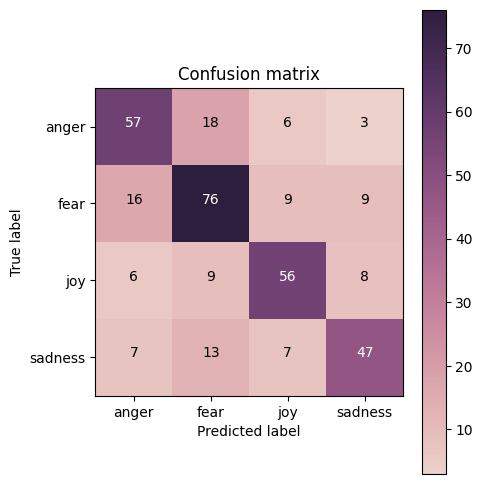

In [ ]:
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---
### ** >>> Exercise 3 (Take home): **  
Can you interpret the results above? What do they mean?

# Answer here
It can be observed that the accuracy of the training set reaches 99%, while the accuracy of the test set is only 68%, indicating that the model performs poorly on out-of-sample data and may suffer from overfitting. Additionally, among the classifications, the performance of the "joy" category is the best.

---
### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results?

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [ ]:
# Answer here
import emoji
import string
from sklearn.naive_bayes import MultinomialNB

x_test = test_df["text"]
y_test = test_df['emotion']

# tokenizer=nltk.word_tokenize considers emojis but treats punctuation as a feature
def custom_tokenizer(text):
    tokens = nltk.word_tokenize(text)
    # Filter out punctuation but keep emojis
    filtered_tokens = [word for word in tokens if word not in string.punctuation or word in emoji.EMOJI_DATA]
    return filtered_tokens


x_count = CountVectorizer(tokenizer=custom_tokenizer,stop_words='english')
x_train = x_count.fit_transform(train_df['text'])
x_test = x_count.transform(test_df['text'])
x_train_df = pd.DataFrame(x_train.toarray(),columns=x_count.get_feature_names_out())
x_test_df = pd.DataFrame(x_test.toarray(),columns=x_count.get_feature_names_out())

C:\Users\58423\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
# Define the target variable
y_train = train_df['emotion']
y_test = test_df['emotion']

# Train a Naive Bayes model
model = MultinomialNB()
model.fit(x_train, y_train)

# Predict on the test set
y_pred = model.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Testing Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Testing Accuracy: 0.77

Classification Report:
              precision    recall  f1-score   support

       anger       0.81      0.73      0.77        84
        fear       0.74      0.81      0.77       110
         joy       0.79      0.82      0.81        79
     sadness       0.74      0.70      0.72        74

    accuracy                           0.77       347
   macro avg       0.77      0.77      0.77       347
weighted avg       0.77      0.77      0.77       347



---
### ** >>> Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

# Answer here
 Decision tree is using gini to find the imformation gain, and set the node depend on the information gain.
 Naive Bayes method suppose every features are identical, find the probability of every scenerio(y) and output the biggest one.
 Naive Bayes is  better than decision tree in this case.

---

## 5. Other things you can try

Thus, there are several things you can try that will affect your results. In order to yield better results, you can experiment by:
- Trying different features (Feature engineering)e.g Word2Vec, PCA, LDA, FastText, Clustering
- Trying different models
- Analyzing your results and interpret them to improve your feature engineering/model building process
- Iterate through the steps above until finding a satisfying result

Remember that you should also consider the task at hand and the model you'll feed the data to.

---
## 6. Deep Learning

We use [Keras](https://keras.io/) to be our deep learning framework, and follow the [Model (functional API)](https://keras.io/models/model/) to build a Deep Neural Network (DNN) model. Keras runs with Tensorflow in the backend. It's a nice abstraction to start working with NN models.

Because Deep Learning is a 1-semester course, we can't talk about each detail about it in the lab session. Here, we only provide a simple template about how to build & run a DL model successfully. You can follow this template to design your model.

We will begin by building a fully connected network, which looks like this:

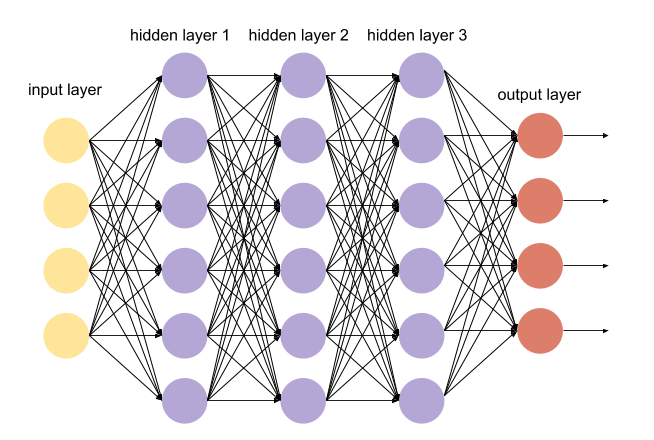

(source: https://github.com/drewnoff/spark-notebook-ml-labs/tree/master/labs/DLFramework)


### 6.1 Prepare data (X, y)

In [ ]:
import keras

# standardize name (X, y)
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## check dimension is a good habbit
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [ ]:
import keras

In [ ]:
BOW_500.transform(test_df['text'])

<347x500 sparse matrix of type '<class 'numpy.int64'>'
	with 4103 stored elements in Compressed Sparse Row format>

### 6.2 Deal with categorical label (y)

Rather than put your label `train_df['emotion']` directly into a model, we have to process these categorical (or say nominal) label by ourselves.

Here, we use the basic method [one-hot encoding](https://en.wikipedia.org/wiki/One-hot) to transform our categorical  labels to numerical ones.


In [ ]:
## deal with label (string -> one-hot)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)


check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
y_train[0:4]:
 92      anger
2279      joy
449     anger
1190     fear
Name: emotion, dtype: object

y_train.shape:  (3613,)
y_test.shape:  (347,)


## After convert
y_train[0:4]:
 [[1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]]

y_train.shape:  (3613, 4)
y_test.shape:  (347, 4)


### 6.3 Build model

In [ ]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  500
output_shape:  4


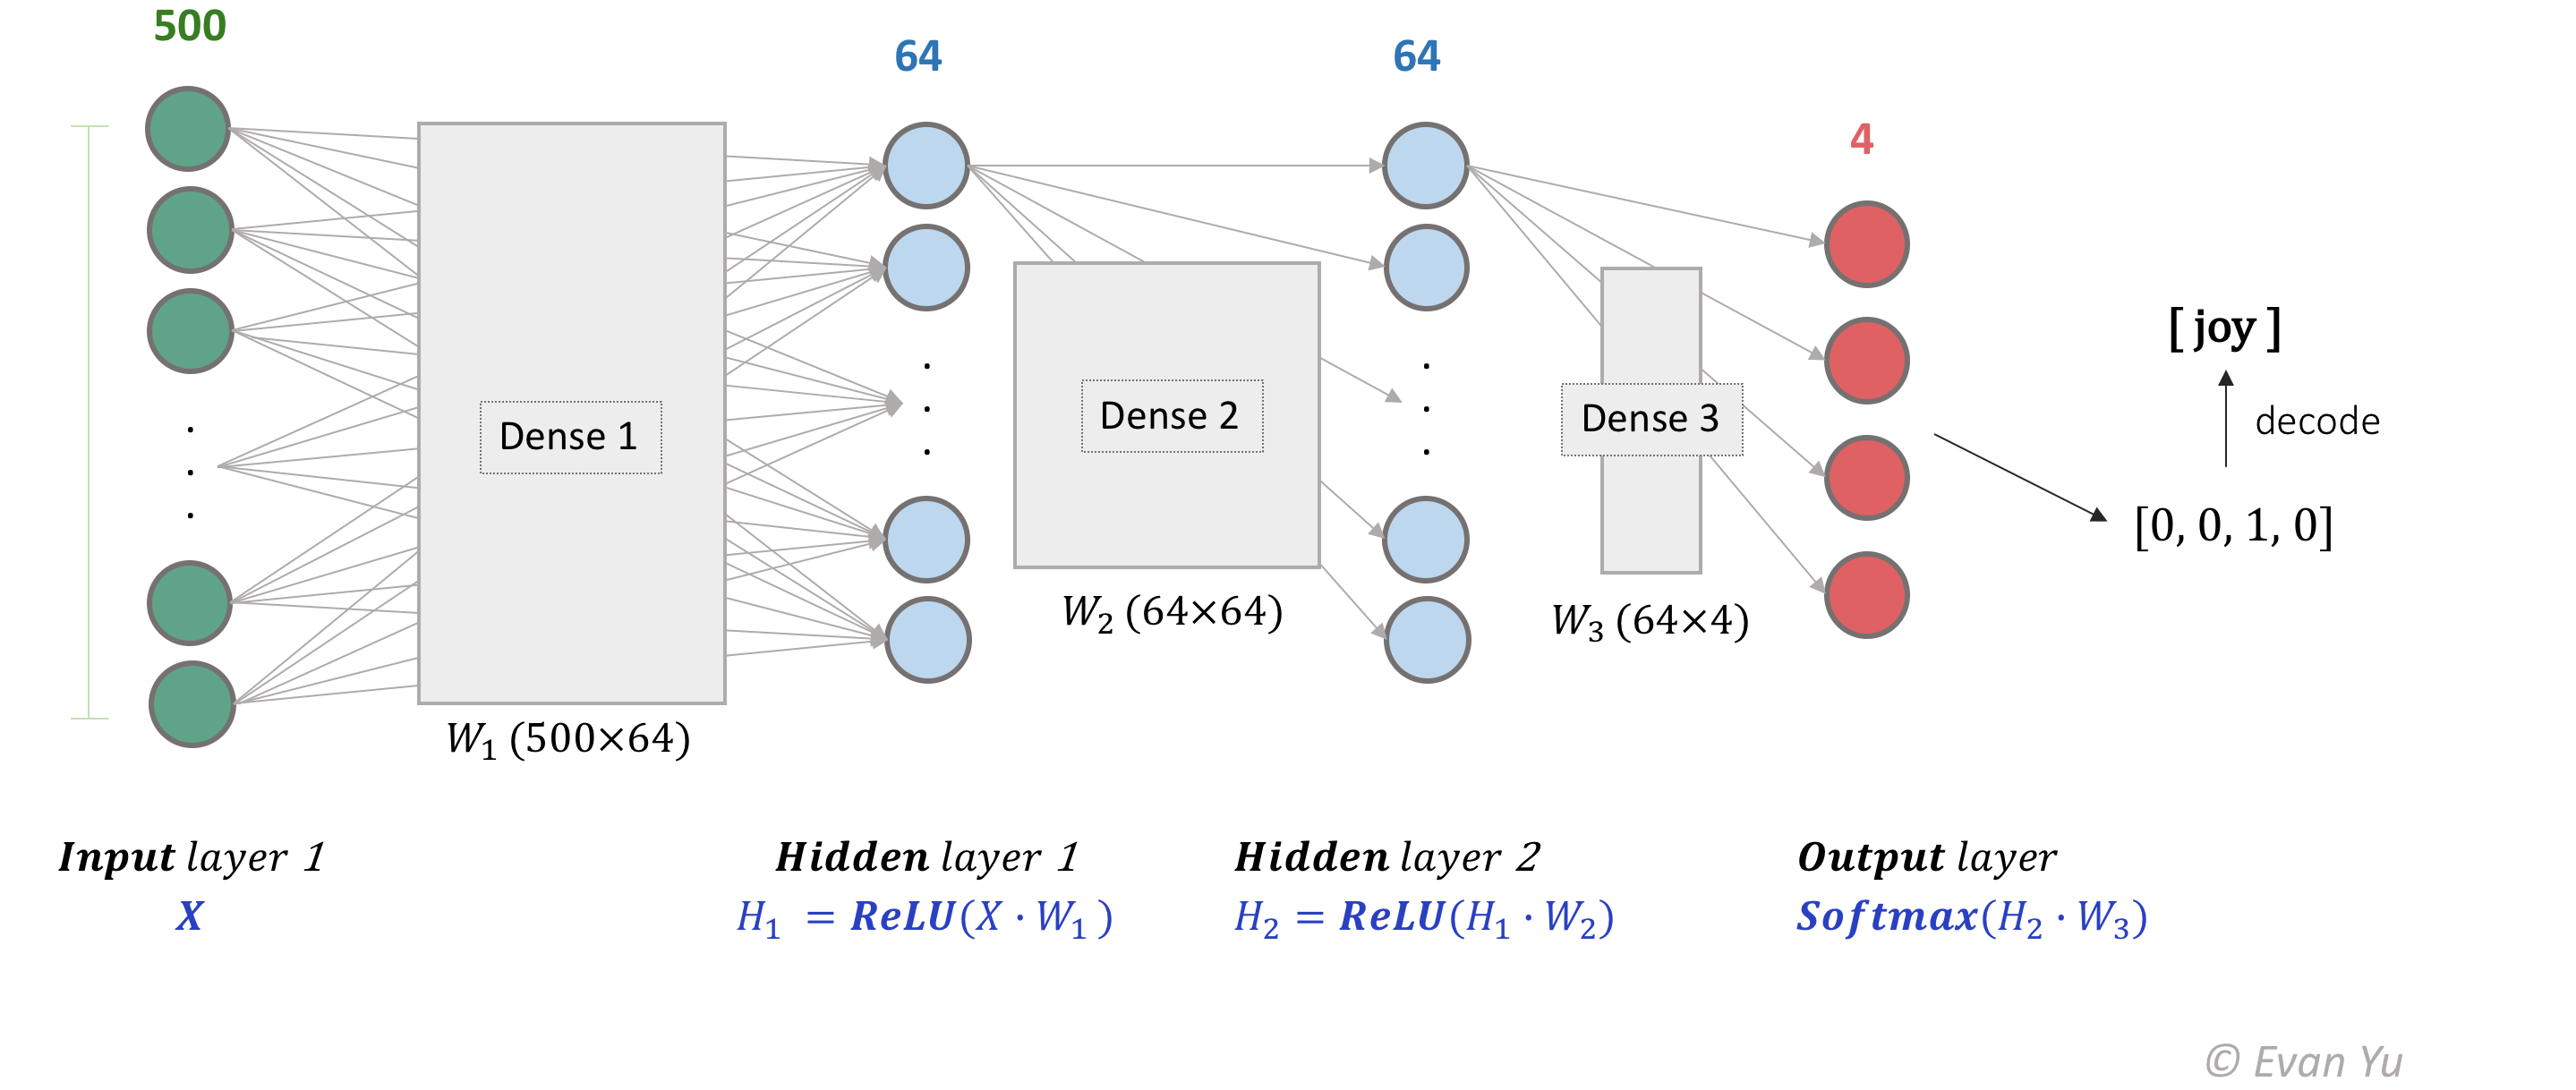

In [ ]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        32,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_1 (ReLU)                  │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax (Softmax)               │ (None, 4)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 36,484 (142.52 KB)

 Trainable params: 36,484 (142.52 KB)

 Non-trainable params: 0 (0.00 B)

### 6.4 Train

In [ ]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('logs/training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

Epoch 1/25


C:\Users\58423\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor']. Received: the structure of inputs=*
  warnings.warn(


113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3498 - loss: 1.3509 - val_accuracy: 0.4553 - val_loss: 1.2596
Epoch 2/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6213 - loss: 1.0678 - val_accuracy: 0.6801 - val_loss: 0.9168
Epoch 3/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8157 - loss: 0.5894 - val_accuracy: 0.7061 - val_loss: 0.7620
Epoch 4/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8598 - loss: 0.4031 - val_accuracy: 0.6974 - val_loss: 0.7789
Epoch 5/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8963 - loss: 0.3084 - val_accuracy: 0.7003 - val_loss: 0.8108
Epoch 6/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9186 - loss: 0.2450 - val_accuracy: 0.6945 - val_loss: 0.8785
Epoch 7/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9418 - loss: 0.1963 - val_accuracy: 0.6916 - val_loss: 0.9559
Epoch 8/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9535 - loss: 0.1671 - val_accuracy: 0.6801 - val_

### 6.5 Predict on testing data

In [ ]:
## predict
pred_result = model.predict(X_test, batch_size=128)
pred_result[:5]

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


array([[5.1884104e-05, 2.0734149e-05, 9.9983692e-01, 9.0494490e-05],
       [3.0252195e-03, 4.1501210e-07, 4.7653597e-08, 9.9697435e-01],
       [1.4973163e-13, 2.1258013e-11, 1.0000000e+00, 8.7573185e-11],
       [1.5587588e-04, 6.1245955e-05, 8.4726624e-03, 9.9131024e-01],
       [3.2000695e-03, 5.6041622e-01, 8.3240338e-05, 4.3630052e-01]],
      dtype=float32)

In [ ]:
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

array(['joy', 'sadness', 'joy', 'sadness', 'fear'], dtype=object)

In [ ]:
from sklearn.metrics import accuracy_score

print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))

testing accuracy: 0.66


In [ ]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")
training_log

epoch  accuracy      loss  val_accuracy  val_loss
0       0  0.388597  1.314309      0.455331  1.259620
1       1  0.655688  0.972649      0.680115  0.916756
2       2  0.799059  0.582654      0.706052  0.762005
3       3  0.851924  0.409547      0.697406  0.778890
4       4  0.887628  0.319440      0.700288  0.810800
5       5  0.907279  0.264440      0.694524  0.878462
6       6  0.935511  0.207083      0.691643  0.955860
7       7  0.945198  0.177741      0.680115  1.004551
8       8  0.954608  0.149497      0.677233  1.070859
9       9  0.959867  0.127109      0.671470  1.123810
10     10  0.967894  0.115905      0.662824  1.154633
11     11  0.965679  0.109022      0.665706  1.201190
12     12  0.969001  0.095695      0.685879  1.230192
13     13  0.972045  0.092279      0.659942  1.320965
14     14  0.972599  0.087335      0.674352  1.363294
15     15  0.971215  0.087008      0.665706  1.420328
16     16  0.973153  0.081363      0.662824  1.439969
17     17  0.974813  0.070809      0.668588  1.480386
18     18  0.973429  0.073887      0.668588  1.497889
19     19  0.977304  0.071538      0.654179  1.576668
20     20  0.976197  0.064994      0.665706  1.593084
21     21  0.976751  0.066482      0.654179  1.567629
22     22  0.978135  0.062308      0.657061  1.625949
23     23  0.978688  0.059109      0.671470  1.586472
24     24  0.978135  0.058026      0.657061  1.642670

---
### ** >>> Exercise 6 (Take home): **  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below.(Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?

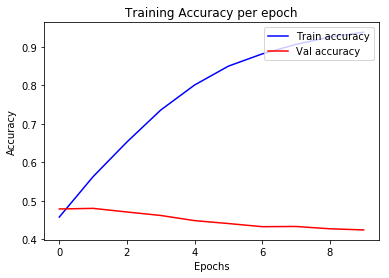


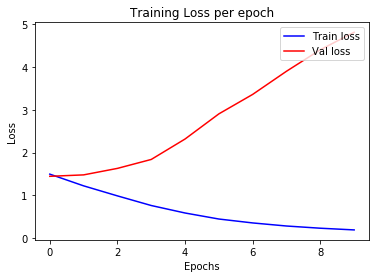

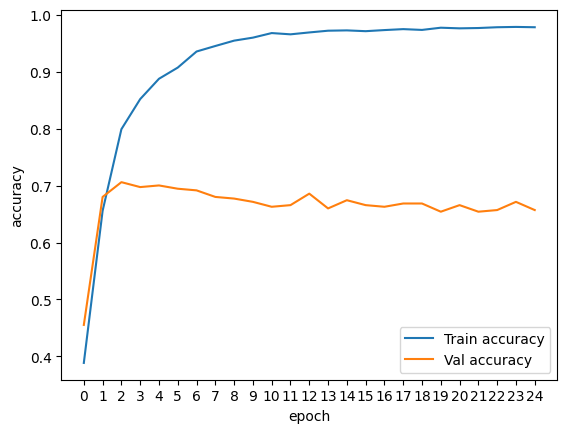

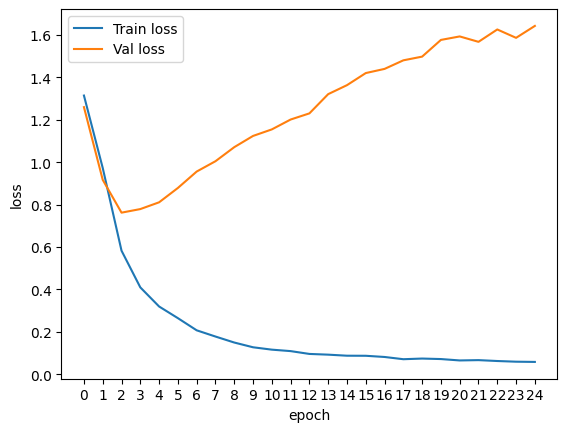

In [ ]:
# Answer here
sns.lineplot(training_log,x="epoch",y="accuracy",label="Train accuracy")
sns.lineplot(training_log,x="epoch",y="val_accuracy",label="Val accuracy")
plt.legend()
plt.xticks(training_log.index)
plt.show()

sns.lineplot(training_log,x="epoch",y="loss",label="Train loss")
sns.lineplot(training_log,x="epoch",y="val_loss",label="Val loss")
plt.xticks(training_log.index)
plt.legend()
plt.show()

---

### Note

If you don't have a GPU (level is higher than GTX 1060) or you are not good at setting lots of things about computer, we recommend you to use the [kaggle kernel](https://www.kaggle.com/kernels) to do deep learning model training. They have already installed all the librarys and provided free GPU for you to use.

Note however that you will only be able to run a kernel for 6 hours. After 6 hours of inactivity, your Kaggle kernel will shut down (meaning if your model takes more than 6 hours to train, you can't train it at once).


### More Information for your reference

* Keras document: https://keras.io/
* Keras GitHub example: https://github.com/keras-team/keras/tree/master/examples
* CS229: Machine Learning: http://cs229.stanford.edu/syllabus.html
* Deep Learning cheatsheet: https://stanford.edu/~shervine/teaching/cs-229/cheatsheet-deep-learning
* If you want to try TensorFlow or PyTorch: https://pytorch.org/tutorials/
https://www.tensorflow.org/tutorials/quickstart/beginner

---
## 7. Word2Vector

We will introduce how to use `gensim` to train your word2vec model and how to load a pre-trained model.

https://radimrehurek.com/gensim/index.html

### 7.1 Prepare training corpus

In [ ]:
## check library
import gensim

## ignore warnings
import warnings
warnings.filterwarnings('ignore')

# # if you want to see the training messages, you can use it
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()

id                                               text  \
92    10092  Worst juror ever? Michelle. You were Nicole's ...   
2279  30275  I want the smoky clouds of laughter to swim ab...   
449   10449  Hey folks sorry if anything offensive got post...   
1190  20333  @markhberman2003 @LanceZierlein @790blessing e...   
2461  30457  @LoriAlan1 Seriously. Digging those eyebrows. ...   

                                         text_tokenized  
92    [Worst, juror, ever, ?, Michelle, ., You, were...  
2279  [I, want, the, smoky, clouds, of, laughter, to...  
449   [Hey, folks, sorry, if, anything, offensive, g...  
1190  [@, markhberman2003, @, LanceZierlein, @, 790b...  
2461  [@, LoriAlan1, Seriously, ., Digging, those, e...

In [ ]:
## create the training corpus
training_corpus = train_df['text_tokenized'].values
training_corpus[:3]

array([list(['Worst', 'juror', 'ever', '?', 'Michelle', '.', 'You', 'were', 'Nicole', "'s", 'biggest', 'threat', '.', '#', 'bitter', '#', 'bb18']),
       list(['I', 'want', 'the', 'smoky', 'clouds', 'of', 'laughter', 'to', 'swim', 'about', 'you', 'forever', 'more', '..']),
       list(['Hey', 'folks', 'sorry', 'if', 'anything', 'offensive', 'got', 'posted', 'on', 'here', 'yesterday', 'my', 'account', 'got', 'hacked', '.', 'All', 'fixed', 'now', 'though', '.', 'I', 'hope', ':', '-/', '#', 'angry', '#', 'annoyed'])],
      dtype=object)

### 7.2 Training our model

You can try to train your own model. More details: https://radimrehurek.com/gensim/models/word2vec.html

In [ ]:
from gensim.models import Word2Vec

## setting
vector_dim = 100
window_size = 5
min_count = 1
training_epochs = 20

## model
word2vec_model = Word2Vec(sentences=training_corpus,
                          vector_size=vector_dim, window=window_size,
                          min_count=min_count, epochs=training_epochs)

2024-12-14 14:39:53,680 : INFO : collecting all words and their counts
2024-12-14 14:39:53,681 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2024-12-14 14:39:53,691 : INFO : collected 11884 word types from a corpus of 72464 raw words and 3613 sentences
2024-12-14 14:39:53,692 : INFO : Creating a fresh vocabulary
2024-12-14 14:39:53,714 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 11884 unique words (100.00% of original 11884, drops 0)', 'datetime': '2024-12-14T14:39:53.714995', 'gensim': '4.3.3', 'python': '3.11.9 (tags/v3.11.9:de54cf5, Apr  2 2024, 10:12:12) [MSC v.1938 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.22631-SP0', 'event': 'prepare_vocab'}
2024-12-14 14:39:53,715 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 72464 word corpus (100.00% of original 72464, drops 0)', 'datetime': '2024-12-14T14:39:53.715990', 'gensim': '4.3.3', 'python': '3.11.9 (tags/v3.11.9:de54cf5, Apr  2 2024, 10:12:12) [M

![Imgur](https://i.imgur.com/Fca3MCs.png)

### 7.3 Generating word vector (embeddings)

In [ ]:
# get the corresponding vector of a word
word_vec = word2vec_model.wv['happy']
word_vec

array([ 0.8288479 ,  0.894877  , -0.03395357, -0.10647568,  0.14706112,
       -1.0832667 ,  0.64040464,  1.413324  , -0.32402155, -0.3455359 ,
       -0.15841755, -0.7407697 , -0.3115621 ,  0.18398817, -0.16779369,
       -0.49671102,  0.6859864 , -0.18551956,  0.14368056, -0.67702323,
        0.64215654,  0.93372303,  0.25696638,  0.07301009,  0.29677054,
        0.1941247 , -0.63795555,  0.48277107, -0.5258581 ,  0.02000819,
        0.11349055, -0.25477126,  0.42577752, -1.0069278 ,  0.24125767,
        0.5711832 ,  0.5363799 , -0.19745593, -0.7232603 , -0.6669296 ,
       -0.2606977 , -0.6014172 , -0.05411633,  0.12554939,  0.8918755 ,
       -0.43342173, -0.9064188 ,  0.5125041 ,  0.47030714,  0.20552555,
       -0.13296828, -0.6620185 , -0.40851325,  0.02208302, -0.7189048 ,
       -0.24683183,  0.18521468, -0.23445159,  0.19057372,  0.44438982,
        0.30833083, -0.4460588 ,  0.88414747,  0.49334738, -0.29063588,
        0.6548546 ,  0.1094092 ,  0.92940557, -1.1472542 ,  0.62

In [ ]:
# Get the most similar words
word = 'happy'
topn = 10
word2vec_model.wv.most_similar(word, topn=topn)

[('help', 0.9304238557815552),
 ('blessed', 0.9239040017127991),
 ('birthday', 0.9165957570075989),
 ('Be', 0.9157320857048035),
 ('kinda', 0.9146117568016052),
 ('cease', 0.912786066532135),
 ('forever', 0.9113578200340271),
 ('smile', 0.9084727764129639),
 ('cry', 0.9064258933067322),
 ('angry', 0.9028437733650208)]

### 7.4 Using a pre-trained w2v model

Instead of training your own model ,you can use a model that has already been trained. Here, we see 2 ways of doing that:


#### (1) Download model by yourself

source: [GoogleNews-vectors-negative300](https://code.google.com/archive/p/word2vec/)

more details: https://radimrehurek.com/gensim/models/keyedvectors.html

In [ ]:
from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
model_path = "GoogleNews-vectors-negative300.bin.gz"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

w2v_google_model.most_similar('happy', topn=10)

2024-12-14 15:17:33,111 : INFO : loading projection weights from GoogleNews-vectors-negative300.bin.gz
2024-12-14 15:18:10,126 : INFO : KeyedVectors lifecycle event {'msg': 'loaded (3000000, 300) matrix of type float32 from GoogleNews-vectors-negative300.bin.gz', 'binary': True, 'encoding': 'utf8', 'datetime': '2024-12-14T15:18:10.124483', 'gensim': '4.3.3', 'python': '3.11.9 (tags/v3.11.9:de54cf5, Apr  2 2024, 10:12:12) [MSC v.1938 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.22631-SP0', 'event': 'load_word2vec_format'}


load ok


[('glad', 0.7408890724182129),
 ('pleased', 0.6632170677185059),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286794662476),
 ('thrilled', 0.6514049172401428),
 ('satisfied', 0.6437949538230896),
 ('proud', 0.636042058467865),
 ('delighted', 0.627237856388092),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247665286064148)]

#### (2) Using gensim api

Other pretrained models are available here: https://github.com/RaRe-Technologies/gensim-data

In [ ]:
import gensim.downloader as api

## If you see `SSL: CERTIFICATE_VERIFY_FAILED` error, use this:
import ssl
import urllib.request
ssl._create_default_https_context = ssl._create_unverified_context

glove_twitter_25_model = api.load("glove-twitter-25")
print('load ok')

glove_twitter_25_model.most_similar('happy', topn=10)

2024-12-14 14:49:28,953 : INFO : loading projection weights from C:\Users\58423/gensim-data\glove-twitter-25\glove-twitter-25.gz
2024-12-14 14:49:50,374 : INFO : KeyedVectors lifecycle event {'msg': 'loaded (1193514, 25) matrix of type float32 from C:\\Users\\58423/gensim-data\\glove-twitter-25\\glove-twitter-25.gz', 'binary': False, 'encoding': 'utf8', 'datetime': '2024-12-14T14:49:50.374470', 'gensim': '4.3.3', 'python': '3.11.9 (tags/v3.11.9:de54cf5, Apr  2 2024, 10:12:12) [MSC v.1938 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.22631-SP0', 'event': 'load_word2vec_format'}


load ok


[('birthday', 0.9577818512916565),
 ('thank', 0.937666654586792),
 ('welcome', 0.93361496925354),
 ('love', 0.9176183342933655),
 ('miss', 0.9164500832557678),
 ('hello', 0.9158351421356201),
 ('thanks', 0.915008544921875),
 ('merry', 0.9053249359130859),
 ('bless', 0.902732253074646),
 ('wish', 0.9013164043426514)]

### 7.5 king + woman - man = ?

Let's run one of the most famous examples for Word2Vec and compute the similarity between these 3 words:

In [ ]:
w2v_google_model.most_similar(positive=['king', 'woman'], negative=['man'])

[('queen', 0.7118193507194519),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321839332581),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.5181134343147278),
 ('sultan', 0.5098593831062317),
 ('monarchy', 0.5087411999702454)]

---
### ** >>> Exercise 7 (Take home): **  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence).
How can we utilize these "word" vectors to represent the sentence data and train our model?


In [ ]:
# Answer here
import torch
import torch.nn as nn
from torch.nn.utils.rnn import pad_sequence, pack_padded_sequence, pad_packed_sequence

temp_list = []  # Temporary list to store word vectors
lengths = []  # List to store the lengths of each sequence
for sentence in training_corpus:  # Iterate through the tokenized sentences
    temp = np.zeros((len(sentence), vector_dim))  # Initialize an array for the word vectors of the current sentence
    for count, word in enumerate(sentence):  # Iterate through the words in the sentence
        temp[count] = word2vec_model.wv[word]  # Retrieve the word vector for each word
    temp_list.append(temp)  # Append the word vector array for the sentence to the temporary list
    lengths.append(len(sentence))  # Append the length of the sentence

max_length = max(lengths)  # Find the maximum sequence length
padded_sequences = np.zeros((len(temp_list), max_length, vector_dim), dtype=np.float32)  # Initialize a padding matrix
for i, seq in enumerate(temp_list):  # Iterate through the sequences
    padded_sequences[i, :len(seq), :] = seq  # Fill the matrix with the word vectors, up to the sequence length

three_dim = np.stack(padded_sequences)  # Stack all padded sequences into a single 3D array

sentence_vectors = torch.tensor(three_dim)  # Convert the 3D array to a PyTorch tensor
rnn = nn.RNN(input_size=vector_dim, hidden_size=256, batch_first=True)  # Initialize an RNN; hidden_size is the output dimension of the RNN
output, hidden = rnn(sentence_vectors)  # Feed the input tensor to the RNN
hidden


tensor([[[ 0.0616,  0.0730,  0.0717,  ...,  0.0269, -0.1167, -0.0210],
         [ 0.0616,  0.0730,  0.0717,  ...,  0.0269, -0.1167, -0.0210],
         [ 0.0616,  0.0730,  0.0717,  ...,  0.0269, -0.1167, -0.0210],
         ...,
         [ 0.0616,  0.0730,  0.0717,  ...,  0.0269, -0.1168, -0.0209],
         [ 0.0616,  0.0730,  0.0717,  ...,  0.0269, -0.1167, -0.0210],
         [ 0.0616,  0.0730,  0.0717,  ...,  0.0269, -0.1167, -0.0210]]],
       grad_fn=<StackBackward0>)

## 8. Clustering: k-means

Here we introduce how to use `sklearn` to do the basic **unsupervised learning** approach, k-means.    

more details: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html


#### Basic concept

![Image](https://i.imgur.com/PEdUf54.png)

(img source: https://towardsdatascience.com/k-means-clustering-identifying-f-r-i-e-n-d-s-in-the-world-of-strangers-695537505d)

In [ ]:
# clustering target
target_list = ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']
print('target words: ', target_list)

# convert to word vector
X = [word2vec_model.wv[word] for word in target_list]

target words:  ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']


In [ ]:
from sklearn.cluster import KMeans

# we have to decide how many cluster (k) we want
k = 2

# k-means model
kmeans_model = KMeans(n_clusters=k)
kmeans_model.fit(X)

# cluster result
cluster_result = kmeans_model.labels_

# show
for i in range(len(target_list)):
    print('word: {} \t cluster: {}'.format(target_list[i], cluster_result[i]))

word: happy 	 cluster: 0
word: fear 	 cluster: 0
word: angry 	 cluster: 0
word: car 	 cluster: 1
word: teacher 	 cluster: 1
word: computer 	 cluster: 1


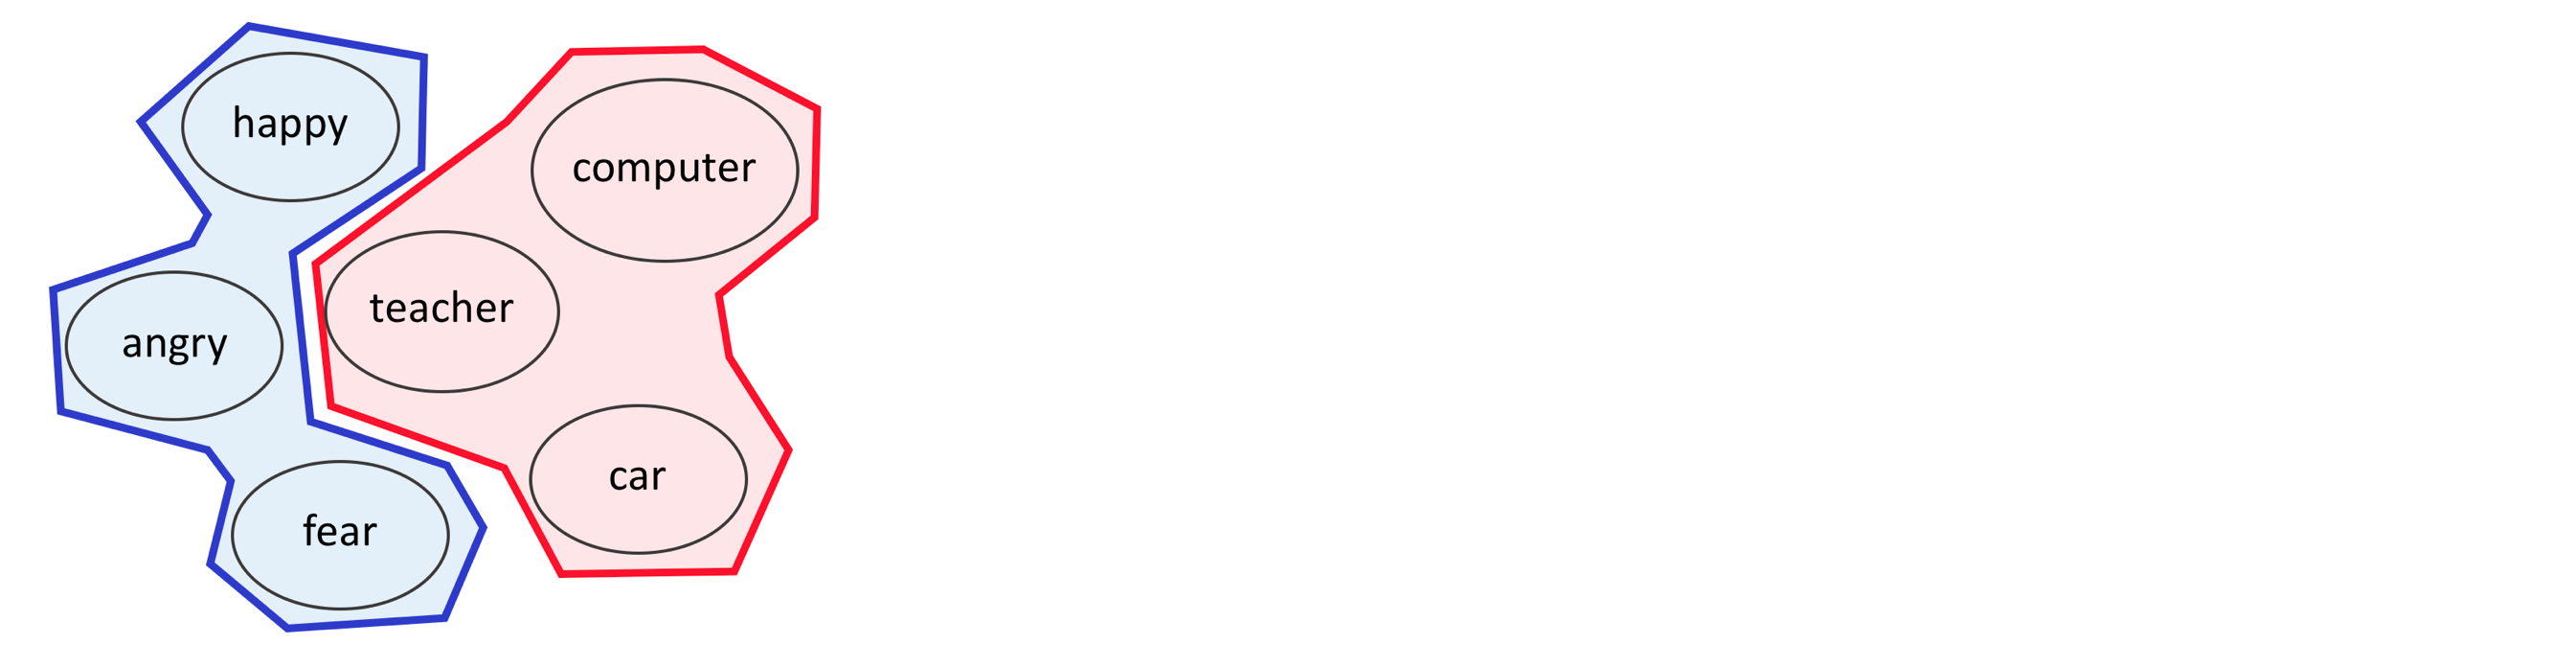

In [ ]:
#check cluster membership
word = 'student'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([1])

In [ ]:
#check cluster membership
word = 'sad'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([0])


## 9. High-dimension Visualization: t-SNE and UMAP

No matter if you use the Bag-of-words, TF-IDF, or Word2Vec, it's very hard to see the embedding result, because the dimension is larger than 3.  

In Lab 1, we already talked about PCA, t-SNE and UMAP. We can use PCA to reduce the dimension of our data, then visualize it. However, if you dig deeper into the result, you'd find it is insufficient.

Our aim will be to create a visualization similar to the one below with t-SNE:

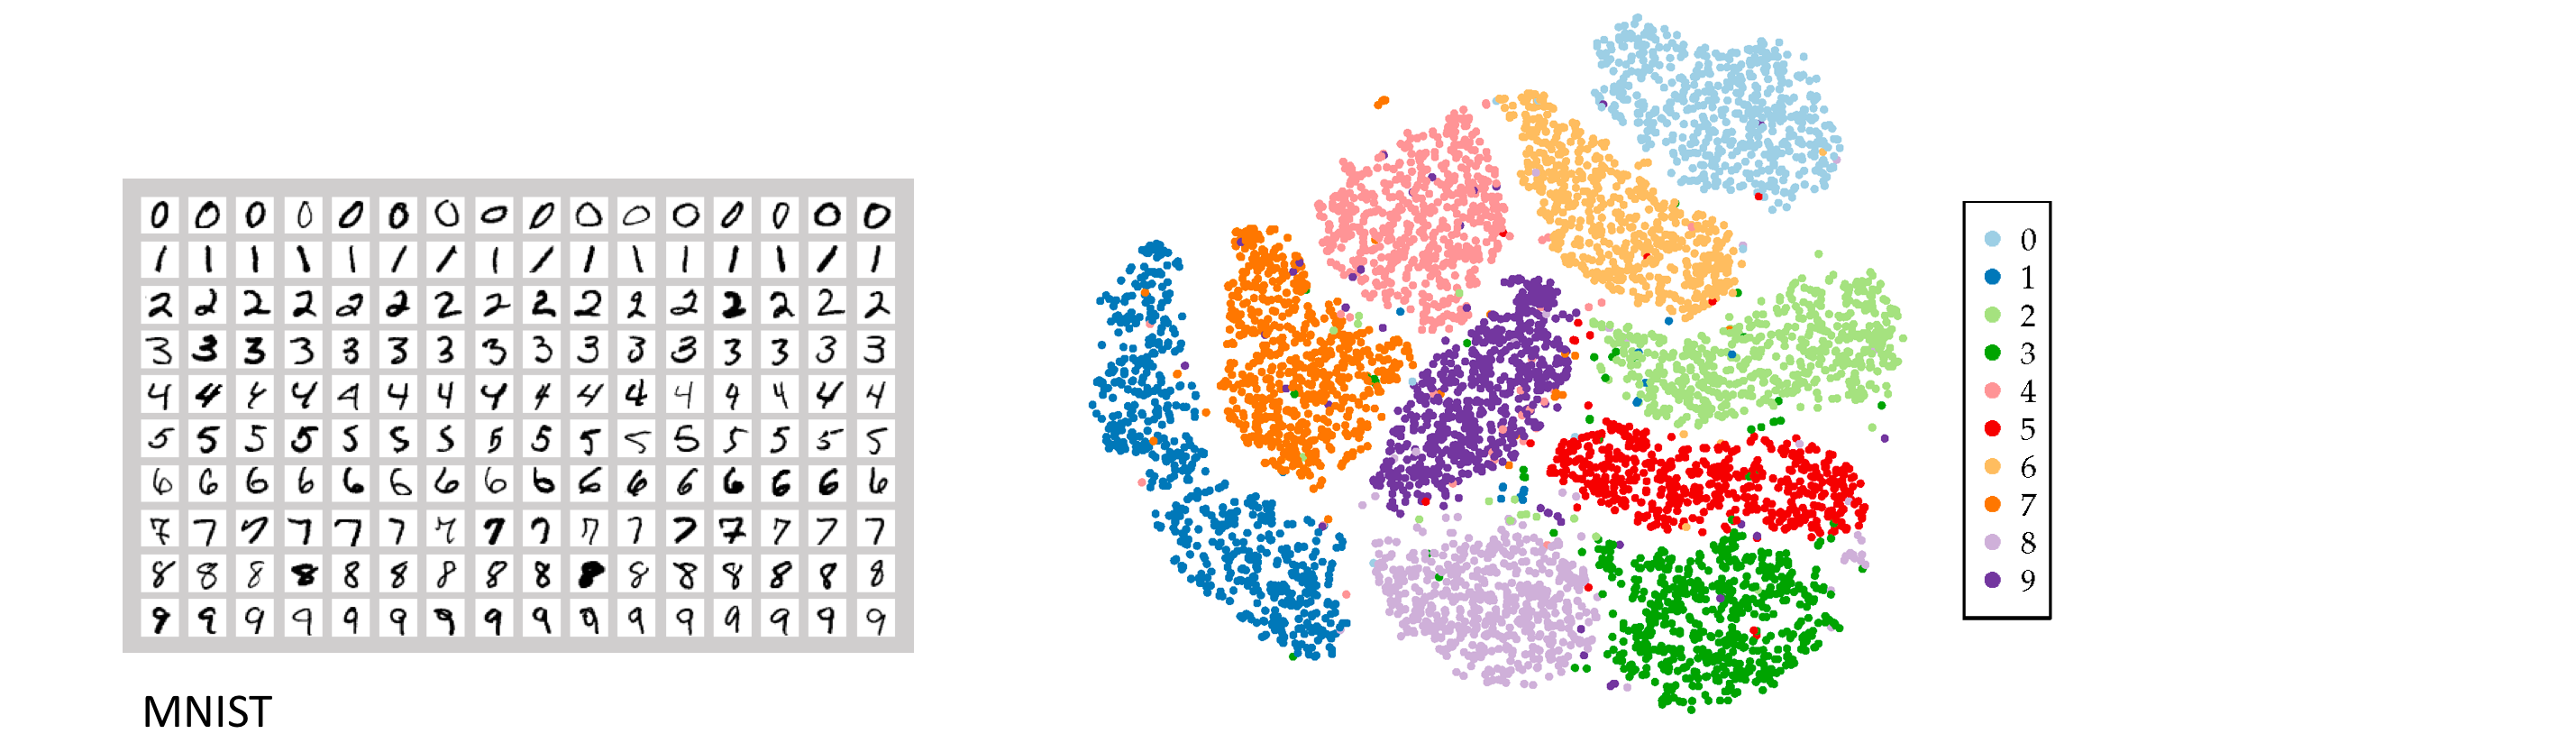

source: https://www.fabian-keller.de/research/high-dimensional-data-visualization

And also like this for UMAP:
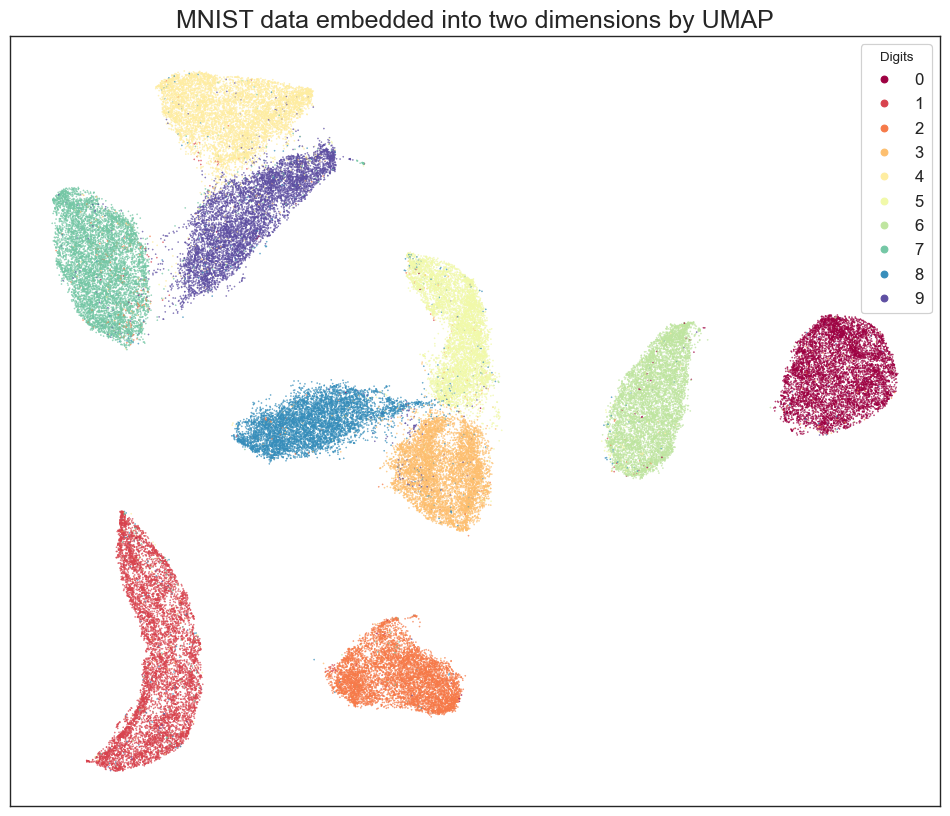

source: https://umap-learn.readthedocs.io/en/latest/auto_examples/plot_mnist_example.html

t-SNE and UMAP reference:  
http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html
https://umap-learn.readthedocs.io/en/latest/

### 9.1 Prepare visualizing target

Let's prepare data lists like:
- happy words
- angry words
- data words
- mining words

In [ ]:
word_list = ['happy', 'angry', 'data', 'mining']

topn = 5
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]
data_words = ['data'] + [word_ for word_, sim_ in w2v_google_model.most_similar('data', topn=topn)]
mining_words = ['mining'] + [word_ for word_, sim_ in w2v_google_model.most_similar('mining', topn=topn)]

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('data_words: ', data_words)
print('mining_words: ', mining_words)

target_words = happy_words + angry_words + data_words + mining_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed']
data_words:  ['data', 'Data', 'datasets', 'dataset', 'databases', 'statistics']
mining_words:  ['mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'data', 'Data', 'datasets', 'dataset', 'databases', 'statistics', 'mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

color list:
['b', 'b', 'b', 'b', 'b', 'b', 'g', 'g', 'g', 'g', 'g', 'g', 'r', 'r', 'r', 'r', 'r', 'r', 'y', 'y', 'y', 'y', 'y', 'y']


### 9.2 Plot using t-SNE and UMAP (2-dimension)

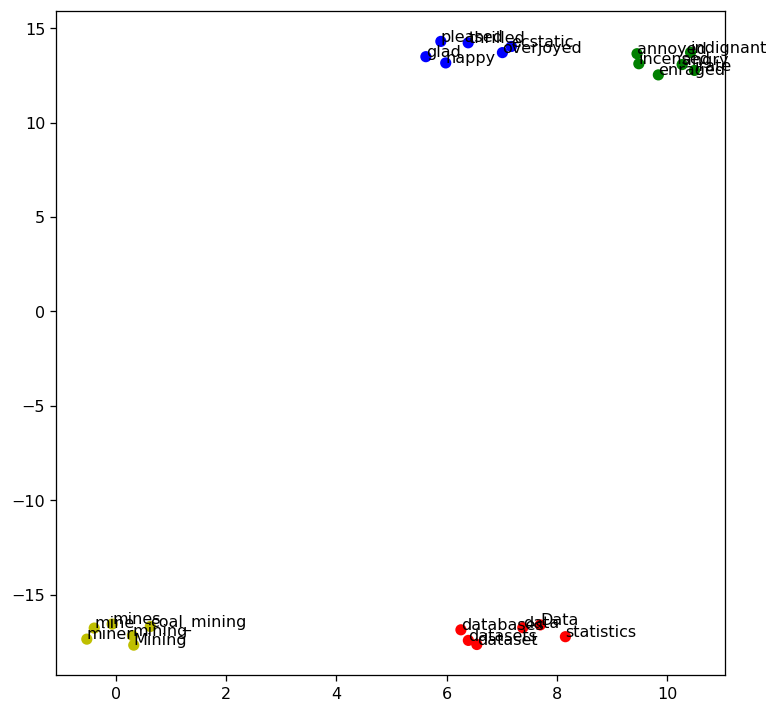

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

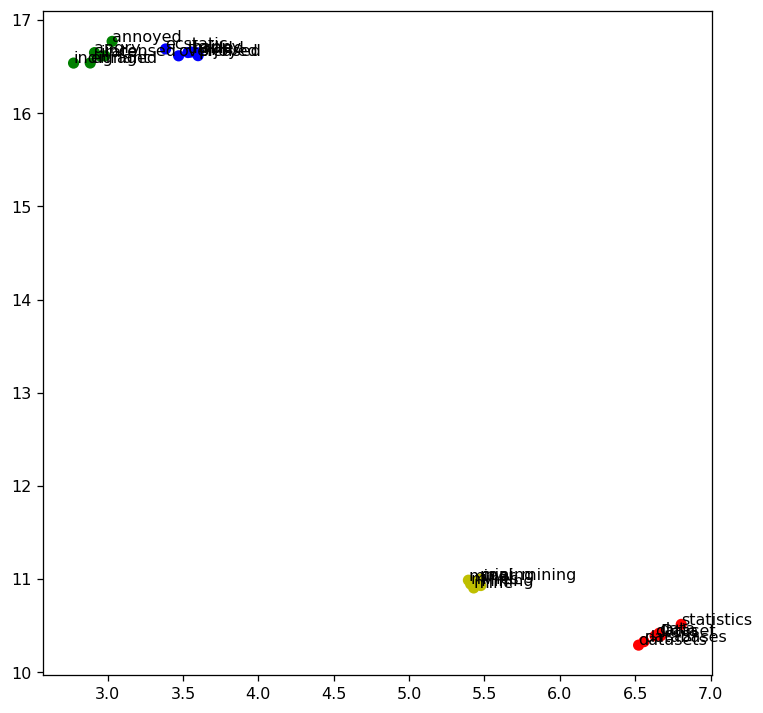

In [ ]:
import matplotlib.pyplot as plt
import umap.umap_ as umap

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## UMAP model
umap_model = umap.UMAP(n_components=2, metric='cosine', random_state=28)

## training
X_umap = umap_model.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_umap[:target_size, 0], X_umap[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_umap[:target_size, 0], X_umap[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()



### ** >>> Exercise 8 (Take home): **  

Generate a t-SNE and UMAP visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total). Compare the differences between both graphs.

In [ ]:
# Answer here
word_list = ['happy', 'angry', 'sac', 'fear']

topn = 15
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]
data_words = ['data'] + [word_ for word_, sim_ in w2v_google_model.most_similar('data', topn=topn)]
mining_words = ['mining'] + [word_ for word_, sim_ in w2v_google_model.most_similar('mining', topn=topn)]

target_words = happy_words + angry_words + data_words + mining_words
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn

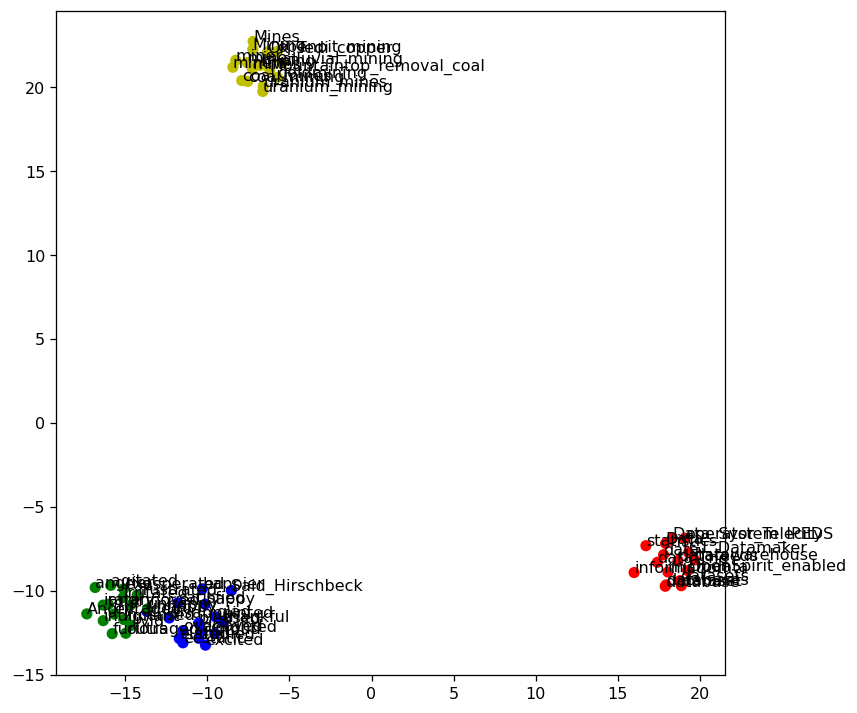

In [ ]:
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

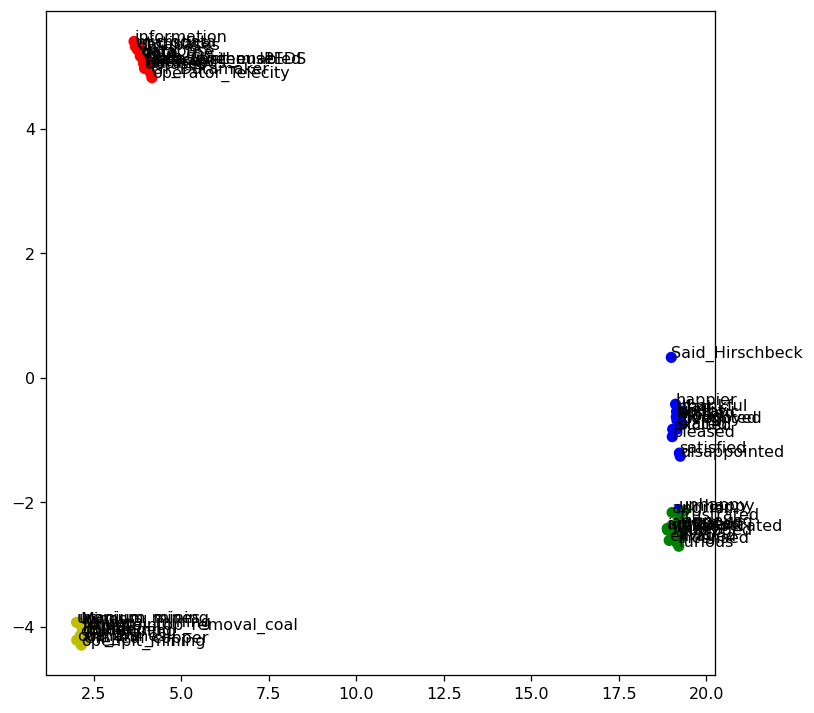

In [ ]:
# umap
## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## UMAP model
umap_model = umap.UMAP(n_components=2, metric='cosine', random_state=28)

## training
X_umap = umap_model.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_umap[:target_size, 0], X_umap[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_umap[:target_size, 0], X_umap[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

## umap figure has higher density than t-sne.

## 10. Large Language Models (LLMs)
Large Language Models (LLMs) are AI models trained on vast text data to understand and generate human language. Models like GPT and BERT excel at tasks like translation, summarization, and sentiment analysis due to their deep learning techniques and large-scale training. Recently these models got popular with the rise of Open-AI's ChatGPT and their different models, showcasing the potential of these models in a lot of aspects of our current society.

Open-source LLMs are cost-effective and customizable, with strong community support, but may underperform compared to paid models and require technical expertise to manage. Paid LLMs offer superior performance, ease of use, and regular updates, but are costly, less flexible, and create dependency on external providers for ongoing access and updates.

#### Open Source LLMs:
In this lab we are going to use Ollama ([Ollama GitHub Link](https://github.com/ollama/ollama)), that is a library that let us use a long list of open-source LLMs of differing size. For this section we are going to be using **'llama3.2'** or **'llama3.2:1b'** for **text based tasks**, and **'llava-phi3'** for **multi-modal tasks** (e.g. image to text). Ollama has a great variety of models, and those can be found here: [model library](https://ollama.com/library). You are free to explore them if you want to try using them, you can check the advantages and disadvantages of each.

Or they can also be observed in here:
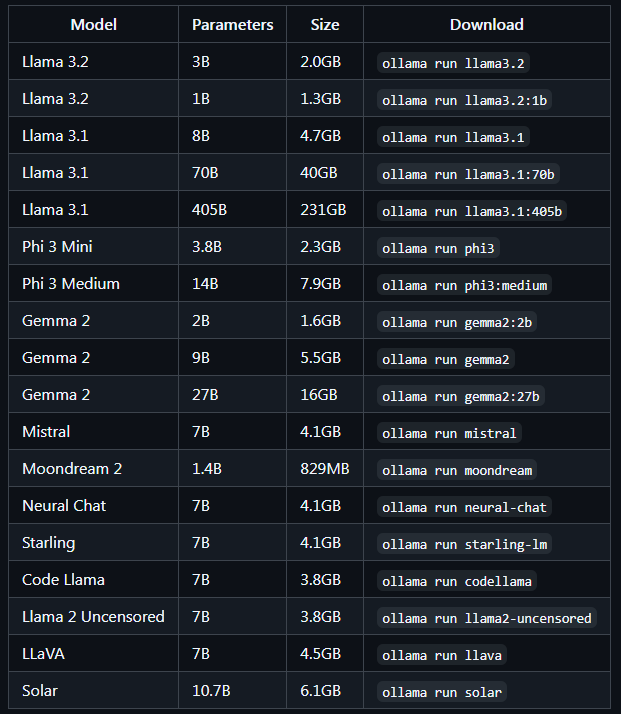

In the previous image we can observe that all LLMs have something called parameters, these are the internal weights that the model learns during training, helping it understand and generate language. The more a model has, the more complex and accurate it can be, but it also needs more memory to run.

For example:

Models with **7 billion parameters** need at least **8 GB of VRAM**.
**13 billion parameters** require **16 GB of VRAM**.
**33 billion parameters** need **32 GB of VRAM**.
The higher the number of parameters, the more memory and computational power the model needs to function efficiently.

And so that is why we are trying to use small LLMs for this practice, because they require a lot of computational resources, so by using 'llama3.2' and 'llava-phi3', both models with 3 billion parameters, we will only use at most 8 GB of VRAM. But if there are some issues with 'llama3.2' we can still use 'llama3.2:1b' the model with 1 billion parameters that requires less resources.

So now let's talk about the models:
**LLaMA 3.2** is part of the LLaMA series (Large Language Model Meta AI), designed to provide efficient language understanding and generation. Despite having fewer parameters than some larger models, it offers strong performance in NLP tasks, making it suitable for scenarios where both accuracy and resource efficiency are important.

**LLaVA** (Large Language and Vision Assistant) models, like **LLaVA-Phi3** are multimodal models combining language and vision capabilities. It can interpret visual inputs like images and generate corresponding text, making it ideal for tasks that require both visual understanding and language generation, such as image captioning and answering visual-based questions.

**I will be using the llama3.2 model going onwards, you can change it for the smallest version if it is necessary for you, or you can try to run it on Kaggle where you can use online GPU resources for it.**

### 10.1 Text Prompting
Like with ChatGPT we can use these models to ask about anything. Here we are going to ask a question and then ask it to return it in markdown format to make it look better afterwards.

In [ ]:
import ollama
response = ollama.chat(model='llama3.2', messages=[
    {
        'role': 'user',
        'content': 'What is data mining? (in markdown format)'
    },
])

print(response['message']['content'])

2024-12-14 15:49:35,309 : INFO : HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


**Data Mining**

Data mining is the process of automatically discovering patterns, relationships, and insights from large datasets. It involves using various techniques, such as machine learning and statistical analysis, to extract valuable information from raw data.

**Key Characteristics of Data Mining:**

*   **Unsupervised learning**: Data mining often involves analyzing data without prior knowledge of its structure or content.
*   **Pattern discovery**: The goal is to identify hidden patterns, relationships, or anomalies within the data.
*   **Insight generation**: Data mining aims to extract actionable insights that can inform business decisions or solve problems.

**Data Mining Techniques:**

*   **Association rule learning**: Identifying frequent patterns or associations between variables.
*   **Clustering**: Grouping similar data points together based on their characteristics.
*   **Regression analysis**: Modeling the relationship between a dependent variable and one or more i

**We can use the IPython library to make the response look better:**

In [6]:
from IPython.display import display, Markdown, Latex
display(Markdown('*some markdown* $\phi$'))

*some markdown* $\phi$

In [ ]:
display(Markdown(response['message']['content']))

**Data Mining**
===============

Data mining is the process of automatically discovering patterns, relationships, and insights from large datasets. It involves using various techniques, such as machine learning and statistical analysis, to extract valuable information from raw data.

**Key Characteristics of Data Mining:**

*   **Unsupervised learning**: Data mining often involves analyzing data without prior knowledge of its structure or content.
*   **Pattern discovery**: The goal is to identify hidden patterns, relationships, or anomalies within the data.
*   **Insight generation**: Data mining aims to extract actionable insights that can inform business decisions or solve problems.

**Data Mining Techniques:**

*   **Association rule learning**: Identifying frequent patterns or associations between variables.
*   **Clustering**: Grouping similar data points together based on their characteristics.
*   **Regression analysis**: Modeling the relationship between a dependent variable and one or more independent variables.
*   **Decision trees**: Creating tree-like models to classify data or make predictions.

**Applications of Data Mining:**

*   **Business intelligence**: Analyzing customer behavior, preferences, and trends to inform marketing strategies.
*   **Customer segmentation**: Identifying distinct groups within a population based on their characteristics.
*   **Predictive modeling**: Building models to forecast future events or outcomes.
*   **Anomaly detection**: Identifying unusual patterns or outliers in large datasets.

**Benefits of Data Mining:**

*   **Improved decision-making**: Providing actionable insights that can inform business decisions.
*   **Increased efficiency**: Automating tasks and reducing manual effort.
*   **Enhanced customer understanding**: Analyzing customer behavior to improve marketing strategies.
*   **Risk reduction**: Identifying potential risks or anomalies within large datasets.


### ** >>> Exercise 9 (Take home): **  

You noticed there is a **role** parameter inside the ollama.chat function, investigate what other roles there can be inside the function and what do they do. Give an example of a prompt using another role in additional to the **user** one.

In [ ]:
# Answer here
response = ollama.chat(model='llama3.2', messages=[
    {
        'role': 'assistant',
        'content':'What is deep learning? (in markdown format)'
    },
])

# print(response['message']['content'])
display(Markdown(response['message']['content']))

2024-12-14 15:54:33,467 : INFO : HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


### Deep Learning
#### **Overview**
Deep learning is a subset of machine learning that involves the use of artificial neural networks with multiple layers to analyze and interpret data.

#### **Key Features**

*   **Multiple Layers**: Deep learning models have many layers, typically more than two. Each layer processes the input data in a different way.
*   **Complex Networks**: The number of neurons (units) in each layer can be very large, allowing the model to learn complex patterns and relationships.
*   **Backpropagation**: An optimization algorithm is used to adjust the weights and biases of the connections between layers.

#### **Types of Deep Learning**
There are several types of deep learning models:

1.  **Convolutional Neural Networks (CNNs)**: Used for image recognition tasks, such as object detection and facial recognition.
2.  **Recurrent Neural Networks (RNNs)**: Used for sequential data, such as text or speech recognition.
3.  **Generative Adversarial Networks (GANs)**: Used for generating new data that resembles existing data.

#### **Applications**
Deep learning has many applications in:

*   **Computer Vision**: Object detection, image classification, and object segmentation
*   **Natural Language Processing (NLP)**: Text classification, sentiment analysis, and language translation
*   **Speech Recognition**: Speech-to-text systems and voice assistants
*   **Robotics**: Control and navigation of robots

#### **Benefits**
Deep learning offers several benefits, including:

*   **Improved Accuracy**: Deep learning models can achieve high accuracy on complex tasks.
*   **Flexibility**: Deep learning models can be adapted to a wide range of applications and data types.
*   **Autonomy**: Deep learning models can learn from raw data without human intervention.

#### **Challenges**
Deep learning also has several challenges, including:

*   **Training Time**: Training deep learning models can take hours or even days.
*   **Computational Resources**: Deep learning requires significant computational resources to train and run.
*   **Interpretability**: Deep learning models can be difficult to interpret, making it hard to understand why they make certain predictions.

#### **Future Directions**
The field of deep learning is constantly evolving. Some future directions include:

*   **Explainable AI**: Developing methods to explain the decisions made by deep learning models.
*   **Edge AI**: Applying deep learning to edge devices for real-time processing and analysis.
*   **Transfer Learning**: Developing methods to transfer knowledge from one task to another.

### 10.2 Multi-Modal Prompting - Text + Images
Multi-modal prompting involves using input from multiple sources or modes, such as text, images, or audio, to guide a model's response. It allows AI to process and generate information based on more than one type of input.

For image plus text prompting, the model receives both an image and a related text prompt. The image provides visual context, while the text gives additional guidance. The model uses both inputs to generate more accurate and contextually relevant responses, which is useful for tasks like image captioning, visual question answering, or content generation based on visual cues.

Let's look at the following images that are in the **pics** folder in the directory of this notebook:

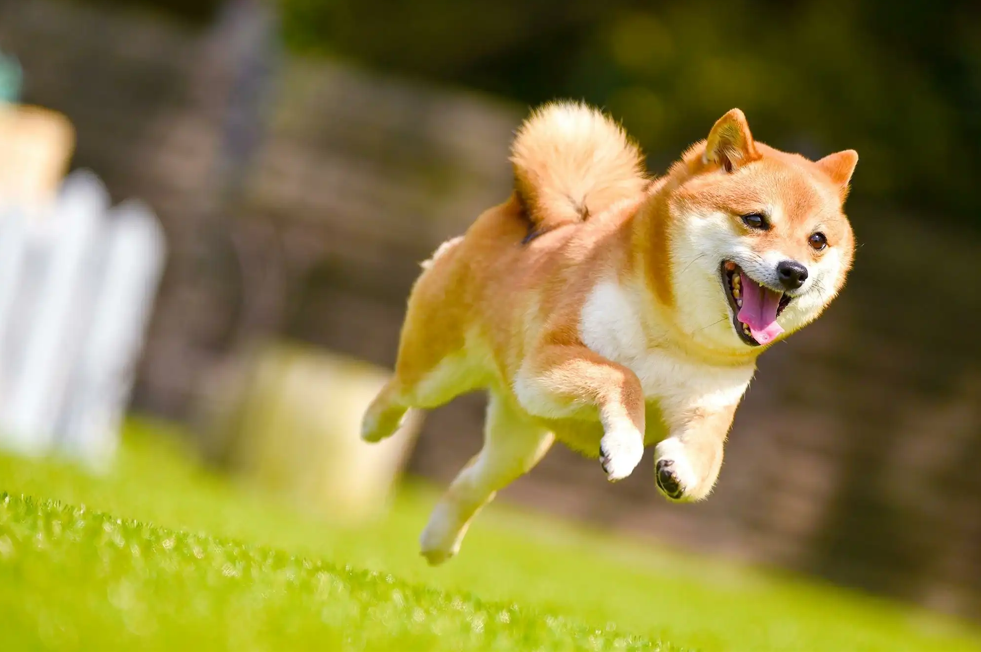
source: https://cooljapan-videos.com/tw/articles/epe0y86g

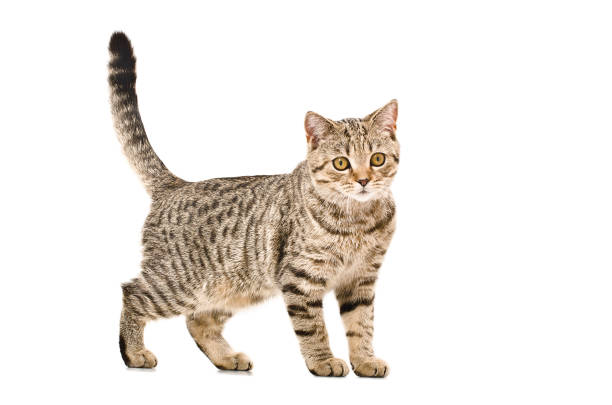
source: https://www.istockphoto.com/photo/young-cat-scottish-straight-gm1098182434-294927481

We will use the **llava-phi3** model that we installed to request a description of the images:

In [ ]:
import ollama
response2 = ollama.chat(model='llava-phi3', messages=[
    {
        'role': 'user',
        'content': 'What is this image about?',
        'images': ['./pics/example1.png'] #Image with the dog
    },
])

display(Markdown(response2['message']['content']))

2024-12-14 16:08:53,011 : INFO : HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


The image captures a moment of pure joy and freedom, featuring a Shiba Inu dog in mid-air as it leaps over a grassy field. The dog's fur is a mix of tan and white, giving it a striking appearance against the green backdrop. Its tail, held high above its head, seems to be wagging in excitement.

The dog's body is fully extended in the jump, front paws reaching for the sky while its hind legs are still grounded on the verdant field below. The angle of the photo gives a sense of motion and speed, as if you can almost hear the soft thud of the grassy field beneath the dog's landing.

In the background, there's a blurred view of trees and a fence, suggesting that this moment was captured outdoors in a park or similar setting. The focus on the jumping dog against this serene backdrop creates an engaging contrast between action and tranquility. It's as if time has been frozen to highlight this single, exuberant leap of the Shiba Inu.

In [ ]:
response3 = ollama.chat(model='llava-phi3', messages=[
    {
        'role': 'user',
        'content': 'What is this image about?',
        'images': ['./pics/example2.jpg'] #Image with the cat
    },
])

display(Markdown(response3['message']['content']))

2024-12-14 16:34:45,337 : INFO : HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


In the center of a stark white background, a tabby cat stands poised and alert. Its body is oriented towards the right side of the frame, but its head has turned to face the camera directly. The cat's fur displays a classic tabby pattern with swirls of gray and black on a lighter base color. Its eyes are wide open, reflecting curiosity or perhaps surprise at being photographed. The tail, long and bushy, hangs down behind it in an elegant curve. Despite the simplicity of the background, the image captures the cat's attention-grabbing gaze beautifully.


### ** >>> Exercise 10 (Take home): **  

Try asking the model with one image of your choosing. Is the description accurate? Why?

In [ ]:
# Answer here
response3 = ollama.chat(model='llava-phi3', messages=[
    {
        'role': 'user',
        'content': 'What is this image about?',
        'images': ['./pics/test.jpg'] #Image with the Formosan Clouded
    },
])

display(Markdown(response3['message']['content']))

2024-12-14 16:53:28,830 : INFO : HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


In the heart of a verdant forest, a majestic leopard has found solace on a sturdy tree branch. The leopard, with its distinctive spotted coat and piercing eyes, sits comfortably in an upright position, embodying the essence of grace and strength. Its head is gently rested on its front paws, as if it's taking a moment to enjoy the serene surroundings. The tree branch beneath it appears solid and reliable, providing a perfect perch for our feline friend.

The background reveals an array of trees, their leaves rustling softly in the wind, creating a soothing melody that only nature can compose. The leopard's gaze is directed off to the side, perhaps drawn by something unseen in this tranquil setting. This image captures not just a moment, but tells a story of life in the wild.

The model's description is generally accurate, possibly because the strong contrast in the image allows the model to clearly distinguish each object.

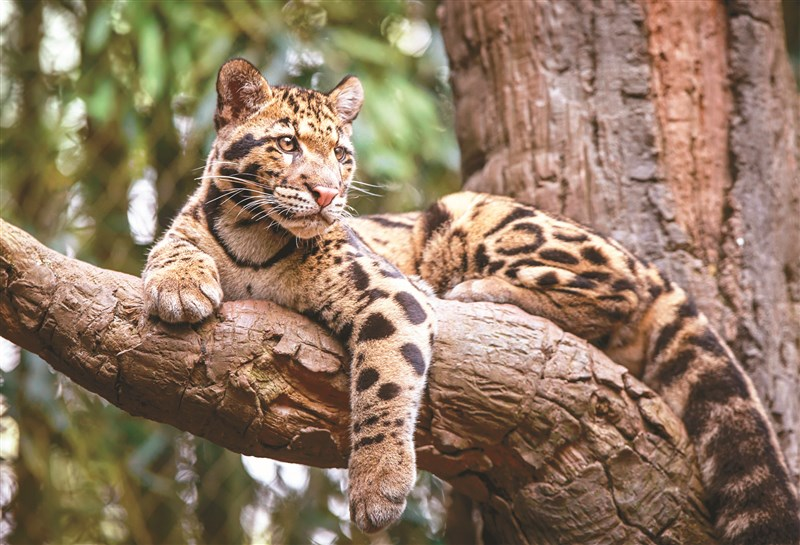

In [ ]:
from PIL import Image
Image.open(r"./pics/test.jpg")

### 10.3 Retrieval-Augmented Generation (RAG)
RAG (Retrieval-Augmented Generation) is a technique where a language model combines document retrieval with text generation. In RAG, a retrieval system first finds relevant documents or text chunks, and then the language model uses this retrieved information to generate a more informed and accurate response. This method enhances the model's ability to answer questions by grounding its responses in real, external data.

In the following code, we will load a webpage as a document, which allows us to retrieve text from a URL. After loading the content, we will split the document into smaller, manageable chunks, making it easier for our model to process. Then, we'll generate embeddings for these chunks with a specified LLM model (e.g., Llama3.2). These embeddings will be stored in a vector database, which enables us to perform similarity searches. By setting up this retrieval system, we can use a RAG chain to answer questions. The retriever finds relevant text chunks from the document based on a query, and the LLM generates a response by incorporating this retrieved information, making the answers more grounded and accurate.

In [7]:
import ollama
import bs4
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import Chroma
from langchain_community.embeddings import OllamaEmbeddings
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough

llm_model = "llama3.2" #You can change to the one of your preference

# Function to load, split, and retrieve documents
def load_and_retrieve_docs(url):
    loader = WebBaseLoader(
        web_paths=(url,),
        bs_kwargs=dict()
    )
    docs = loader.load() #We will load the URL that will serve as our data source
    text_splitter = RecursiveCharacterTextSplitter(chunk_size=500, chunk_overlap=100) #We will divide the URL in chunks of text for easier comparison in the vector space
    splits = text_splitter.split_documents(docs)
    #print(splits) #You can print this to see how the chunks in the url where split
    embeddings = OllamaEmbeddings(model=llm_model) #Generating embeddings with our chosen model
    vectorstore = Chroma.from_documents(documents=splits, embedding=embeddings) #Our vector space for comparison
    return vectorstore.as_retriever()

url="https://www.ibm.com/topics/large-language-models"
# Create the retriever
retriever = load_and_retrieve_docs(url)

def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs) #Format the retrieved docs in an orderly manner for prompting

# Define the Ollama LLM function
def ollama_llm(question, context):
    formatted_prompt = f"Question: {question}\n\nContext: {context}"
    response = ollama.chat(model='llama3.2', messages=[{'role': 'user', 'content': formatted_prompt}])
    return response['message']['content']

# Define the RAG chain
def rag_chain(question):
    retrieved_docs = retriever.invoke(question)
    formatted_context = format_docs(retrieved_docs)
    return ollama_llm(question, formatted_context)

# Use the RAG chain
result = rag_chain("What are the related solutions of IBM with LLMs?")
display(Markdown(result))

It appears that you haven't provided any specific information about IBM's related solutions with LLMs. However, I can provide some general insights on how IBM is leveraging Large Language Models (LLMs) in their offerings.

IBM has been actively exploring the potential of LLMs to drive innovation and business value across various industries. Here are a few examples:

1. **Watson Assistant**: IBM's cloud-based AI platform, Watson Assistant, uses LLMs to power its natural language processing capabilities. This enables businesses to create conversational interfaces that can understand and respond to customer inquiries.
2. **IBM Knowledge Panel**: The IBM Knowledge Panel is a feature that leverages LLMs to provide users with relevant information and answers to their questions. It's integrated into various IBM products, including the Watson Assistant platform.
3. **IBM CodeNet**: IBM CodeNet is an AI-powered code generation tool that uses LLMs to help developers generate high-quality code. This can save time and effort for developers while also improving code quality.
4. **IBM Writing Assistant**: The IBM Writing Assistant is a cloud-based tool that uses LLMs to assist writers with content creation, editing, and proofreading tasks.

These are just a few examples of how IBM is leveraging LLMs in their offerings. As the field of AI continues to evolve, we can expect to see more innovative applications of LLMs across various industries and use cases.


### **Actual content in the URL:**
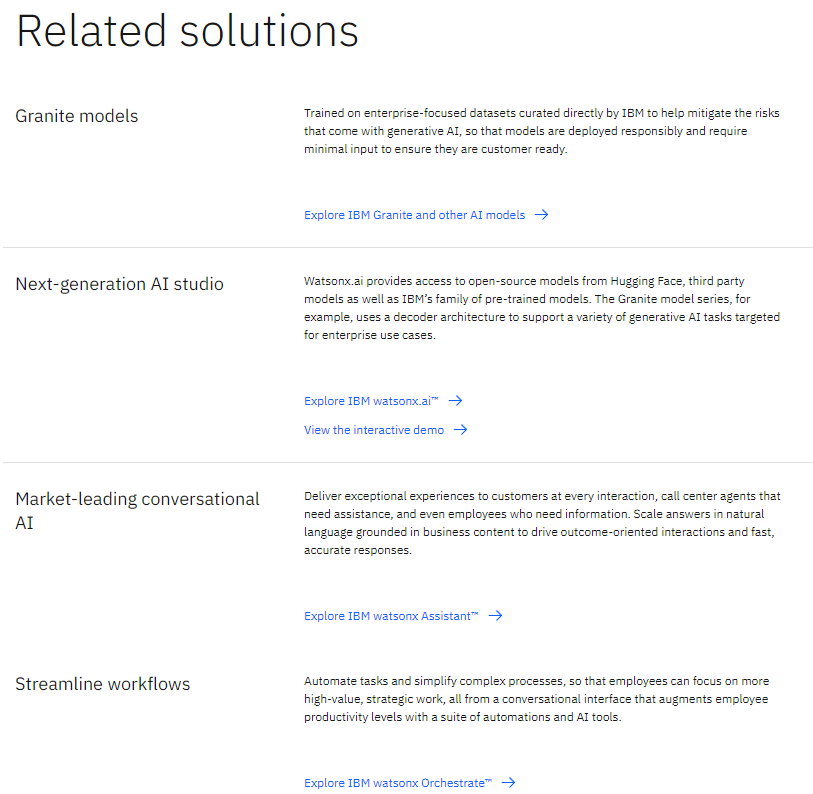

source: https://www.ibm.com/topics/large-language-models



### ** >>> Exercise 11 (Take home): **  

Try to modify the code to make it accept **three URLs**, or **three text documents** of your choosing. After modifying it, make **three prompts/questions** with information that can be found in each of the documents/urls, **compare the accuracy of the response** with the actual answer. Investigate and discuss the advantages and disadvantages of RAG systems.

In [8]:
# Answer here
# Define the LLM model
llm_model = "llama3.2"  # You can change to the one of your preference

# Function to load, split, and retrieve documents from multiple sources
def load_and_retrieve_docs(urls):
    all_docs = []
    for url in urls:
        loader = WebBaseLoader(
            web_paths=(url,),
            bs_kwargs=dict()
        )
        docs = loader.load()  # Load the URL as data source
        text_splitter = RecursiveCharacterTextSplitter(chunk_size=500, chunk_overlap=100)  # Split text for vector comparison
        splits = text_splitter.split_documents(docs)
        all_docs.extend(splits)  # Combine documents from all URLs

    embeddings = OllamaEmbeddings(model=llm_model)  # Generate embeddings
    vectorstore = Chroma.from_documents(documents=all_docs, embedding=embeddings)  # Create vector space
    return vectorstore.as_retriever()

# URLs or text documents to process
urls = [
    "https://www.ibm.com/topics/large-language-models",
    "https://www.ibm.com/topics/instruction-tuning",
    "https://cloud.google.com/use-cases/retrieval-augmented-generation"
]

# Create the retriever
retriever = load_and_retrieve_docs(urls)

# Format retrieved documents for prompting
def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs)

# Define the Ollama LLM function
def ollama_llm(question, context):
    formatted_prompt = f"Question: {question}\n\nContext: {context}"
    response = ollama.chat(model='llama3.2', messages=[{'role': 'user', 'content': formatted_prompt}])
    return response['message']['content']

# Define the RAG chain
def rag_chain(question):
    retrieved_docs = retriever.invoke(question)
    formatted_context = format_docs(retrieved_docs)
    return ollama_llm(question, formatted_context)

# Example questions based on the documents/URLs
questions = [
    "What are the related solutions of IBM with LLMs?",  # Related to IBM URL
    "Why we use instruction-tuning ",  # Related to instruction-tuning URL
    "Pros and cons with RAG"  # Related to RAG URL
]

# Use the RAG chain to answer questions
for question in questions:
    result = rag_chain(question)
    print(f"Question: {question}\nAnswer:\n{result}\n{'-' * 80}")

Question: What are the related solutions of IBM with LLMs?
Answer:
Based on the provided information, IBM has been exploring related solutions with Large Language Models (LLMs). However, the specific solutions developed by IBM are not explicitly mentioned.

That being said, I can provide some possible areas where IBM might be working with LLMs:

1. **Chatbots and Virtual Assistants**: IBM might be using LLMs to power its chatbot and virtual assistant solutions, providing users with more conversational and human-like interactions.
2. **Content Generation**: IBM could be leveraging LLMs to generate high-quality content, such as articles, social media posts, or product descriptions, to help businesses produce more engaging content at scale.
3. **Language Translation**: With the ability to translate languages other than English, IBM might be using LLMs to enhance its translation services, making them more accurate and efficient.
4. **Content Summarization and Analysis**: LLMs could be used

### 10.4 Generating LLM Embeddings:
LLM embeddings are dense vector representations of text generated by Large Language Models. These embeddings, like we have already seen in the lab, capture the semantic meaning and relationships between words, phrases, or even entire documents by mapping them into a high-dimensional space where similar pieces of text are placed closer together. What makes LLM embeddings special is that they are contextual and rich in meaning, meaning the same word can have different embeddings based on its surrounding context.

For example, the word **"bank"** would have different embeddings in the sentences **"I sat by the river bank"** and **"I deposited money in the bank."** This ability to understand and encode context enables LLM embeddings to outperform traditional techniques (like TF-IDF or one-hot encoding) by providing a deeper, more nuanced representation of language.

Additionally, LLM embeddings are pre-trained on vast amounts of data, allowing them to generalize well across different tasks (like classification, clustering, or similarity detection) without the need for extensive retraining. This makes them highly valuable in many natural language processing tasks today.

**Now let's generate some embeddings with llama 3.2 for our dataset:**

In [ ]:
import pandas as pd
import ollama

# Let's copy our dataframes for training and testing
df_train = train_df
df_test = test_df
# Define a function to generate embeddings
def generate_embeddings(row,text_column_name='text'):
    embeddings = ollama.embeddings(
        model='llama3.2',
        prompt=row[text_column_name],
    )
    return embeddings["embedding"]

In [ ]:
# We use the text column
column_name = 'text'

# Apply the function to the specified column and store the result in a new column 'embeddings'
df_train['embeddings'] = df_train.apply(lambda row: generate_embeddings(row, column_name), axis=1)

In [ ]:
df_test['embeddings'] = df_test.apply(lambda row: generate_embeddings(row, column_name), axis=1)

In [ ]:
df_train #We can see the new column with the embeddings

id                                               text  emotion  \
3541  40714  #FF \n\n@The_Family_X \n\n#soul #blues &amp; #...  sadness   
2482  30478  Accept the challenges so that you can feel the...      joy   
2275  30271  Not untill today has anyone ever said to me th...      joy   
3560  40733  Be joyful in hope, patient in affliction, fait...  sadness   
1400  20543  That last minute was like watching a horror sh...     fear   
...     ...                                                ...      ...   
3247  40420  “We can easily #forgive a #child who is #afrai...  sadness   
1922  21065          @Burnt_Out_Darth @theaterofscifi thanks.      fear   
3471  40644  @Cigna bows out for the moment. Rather than su...  sadness   
735   10735  don't give someone power by letting their word...    anger   
3430  40603  there’s shaytan in this room wallahi its been ...  sadness   

      intensity                                         embeddings  
3541      0.250  [-1.956926941871643, 0.374812513589859, 1.7580...  
2482      0.440  [-0.792119562625885, 0.5829741358757019, 2.002...  
2275      0.580  [-0.04283670708537102, -0.9632987976074219, 0....  
3560      0.216  [-1.6055219173431396, 0.22279092669487, 2.2037...  
1400      0.500  [0.5279636979103088, 1.0410557985305786, 0.331...  
...         ...                                                ...  
3247      0.458  [-0.2972417175769806, -0.055185467004776, -1.5...  
1922      0.220  [-1.8465036153793335, 0.2973911166191101, -0.2...  
3471      0.312  [-0.6743541955947876, -0.3421587646007538, 2.2...  
735       0.333  [-1.3774847984313965, 1.4408318996429443, 4.99...  
3430      0.333  [-0.9682024121284485, -0.7099926471710205, 2.0...  

[3613 rows x 5 columns]

In [ ]:
df_test #We can see the new column with the embeddings

id                                               text  emotion  \
204  30833        @Bluebelle89 @lsmith855 liking the optimism      joy   
169  21232  @mikefreemanNFL \nIsn't OBrien supposed to be ...     fear   
276  40789  Stars, when you shine,\nYou know how I feel.\n...  sadness   
343  40856  I'd rather laugh with the rarest genius, in be...  sadness   
29   10886  @isthataspider @dhodgs i will fight this guy! ...    anger   
..     ...                                                ...      ...   
173  21236  Bout ta get my @dontbreathe on up in here! @Wa...     fear   
53   10910  Having a baby born too soon is #lifechanging 6...    anger   
107  21170  The Apocalypse has hit our gym and it's  nothi...     fear   
20   10877  [ @HedgehogDylan ] *she would frown a bit, fol...    anger   
290  40803  @abra @abra @abra what're you doing to my ears...  sadness   

     intensity                                         embeddings  
204      0.540  [0.15033306181430817, -0.2906293272972107, 2.0...  
169      0.479  [0.14697742462158203, 0.884884238243103, -0.28...  
276      0.292  [0.07446754723787308, 0.06407629698514938, -0....  
343      0.688  [-0.21125206351280212, -0.7585004568099976, -0...  
29       0.708  [-1.0068984031677246, 0.773884654045105, 3.716...  
..         ...                                                ...  
173      0.688  [-2.128566265106201, 1.3361091613769531, 1.369...  
53       0.375  [-1.0448921918869019, -1.3573086261749268, -0....  
107      0.583  [-0.7601320147514343, 0.07843855023384094, 1.0...  
20       0.500  [-0.5890992283821106, 1.1939854621887207, 0.13...  
290      0.236  [-0.016097567975521088, 0.25269079208374023, -...  

[347 rows x 5 columns]

Now let's train some models with these embeddings:

**KNeighborsClassifier (KNN)**: KNN is a simple, instance-based machine learning algorithm used for classification. It works by finding the 'k' nearest neighbors to a data point based on a distance metric (e.g., Euclidean distance) and assigning the most common class among those neighbors to the data point. KNN is non-parametric, meaning it doesn’t assume a specific form for the underlying data distribution, and it classifies points based on their similarity to other points in the training set. It's easy to understand and implement, though it can become computationally expensive with large datasets.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Let's use the new Llama 3.2 embeddings as our training features and the emotions as our labels
X_train = df_train["embeddings"].tolist()
y_train = df_train['emotion']


# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=10)

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
len(df_train["embeddings"][0]) # Llama 3.2 embedding dimension is 3072

3072

In [ ]:
X_test = df_test["embeddings"].tolist()
y_test = df_test['emotion']

# Predicting the label for the test data
y_pred = knn.predict(X_test)

#Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print(f'KNN Accuracy: {accuracy}')

KNN Accuracy: 0.4610951008645533


In [ ]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

       anger       0.40      0.44      0.42        84
        fear       0.53      0.54      0.53       110
         joy       0.45      0.43      0.44        79
     sadness       0.45      0.41      0.43        74

    accuracy                           0.46       347
   macro avg       0.46      0.45      0.45       347
weighted avg       0.46      0.46      0.46       347



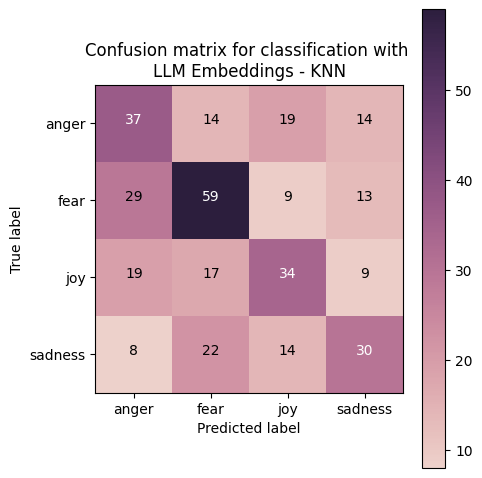

In [ ]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm2 = confusion_matrix(y_true=y_test, y_pred=y_pred)
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm2, classes=my_tags, title='Confusion matrix for classification with \nLLM Embeddings - KNN')

Now let's also try to apply our **Neural Network** to these embeddings:

In [ ]:
X_llama_train = np.vstack(df_train["embeddings"].to_numpy()) #Defining our train set

In [ ]:
X_llama_test = np.vstack(df_test["embeddings"].to_numpy()) #Defining our test set

In [ ]:
X_llama_train.shape #(Number of data, Llama 3.2 embedding size)

(3613, 3072)

In [ ]:
X_llama_test.shape #(Number of data, Llama 3.2 embedding size)

(347, 3072)

In [ ]:
#One-hot encoding our labels
y_train_llama = label_encode(label_encoder, y_train)
y_test_llama = label_encode(label_encoder, y_test)

In [ ]:
# I/O check
input_shape_llama = len(X_llama_train[0])
print('input_shape: ', input_shape_llama)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  3072
output_shape:  4


In [ ]:
#We try the same Neural Network Model Again
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape_llama, ))  # 3072
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary() #We can notice that our parameter numbers went up because of the increase in the dimension of our input

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │         196,672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_2 (ReLU)                       │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_3 (ReLU)                       │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 4)                   │             260 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ softmax_1 (Softmax)                  │ (None, 4)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 201,092 (785.52 KB)

 Trainable params: 201,092 (785.52 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('logs/training_log_2.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_llama_train, y_train_llama,
                    epochs=epochs,
                    batch_size=batch_size,
                    callbacks=[csv_logger],
                    validation_data = (X_llama_test, y_test_llama))
print('training finish')

Epoch 1/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3987 - loss: 1.3328 - val_accuracy: 0.5274 - val_loss: 1.1608
Epoch 2/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6315 - loss: 0.9031 - val_accuracy: 0.5850 - val_loss: 0.9942
Epoch 3/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7407 - loss: 0.6773 - val_accuracy: 0.5908 - val_loss: 1.0926
Epoch 4/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8009 - loss: 0.5453 - val_accuracy: 0.5764 - val_loss: 1.1191
Epoch 5/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8353 - loss: 0.4480 - val_accuracy: 0.5821 - val_loss: 1.2691
Epoch 6/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8696 - loss: 0.3624 - val_accuracy: 0.5735 - val_loss: 1.3120
Epoch 7/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8804 - loss: 0.3191 - val_accuracy: 0.5764 - val_loss: 1.4206
Epoch 8/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9141 - loss: 0.2532 - val_accuracy: 0.

In [ ]:
## predict
pred_result = model.predict(X_llama_test, batch_size=128)
pred_result[:5]

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


array([[3.4879174e-03, 7.9337490e-01, 2.0105434e-03, 2.0112669e-01],
       [1.8636035e-04, 9.9922419e-01, 5.4436974e-04, 4.4976925e-05],
       [4.4134462e-01, 1.4614439e-04, 6.5010696e-05, 5.5844420e-01],
       [6.0492437e-03, 4.4411428e-02, 5.8754980e-05, 9.4948047e-01],
       [8.0596912e-01, 1.7712364e-02, 1.3691780e-06, 1.7631720e-01]],
      dtype=float32)

In [ ]:
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

array(['fear', 'fear', 'sadness', 'sadness', 'anger'], dtype=object)

In [ ]:
from sklearn.metrics import accuracy_score
#Accuracy
print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test_llama), pred_result), 2)))

testing accuracy: 0.56


In [ ]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log_2.csv")
training_log

epoch  accuracy      loss  val_accuracy  val_loss
0       0  0.464157  1.199230      0.527378  1.160825
1       1  0.635760  0.878343      0.585014  0.994163
2       2  0.730141  0.690085      0.590778  1.092552
3       3  0.795184  0.564868      0.576369  1.119069
4       4  0.830888  0.454494      0.582133  1.269099
5       5  0.862441  0.384078      0.573487  1.312000
6       6  0.883200  0.316203      0.576369  1.420619
7       7  0.911154  0.263574      0.585014  1.556489
8       8  0.920011  0.221728      0.576369  1.601106
9       9  0.929698  0.196005      0.561960  1.633095
10     10  0.938832  0.173549      0.579251  1.813899
11     11  0.950733  0.151895      0.585014  1.781666
12     12  0.955162  0.128970      0.596542  1.896526
13     13  0.960697  0.108481      0.570605  1.918765
14     14  0.960697  0.113763      0.564842  2.003343
15     15  0.963188  0.110003      0.567723  2.420640
16     16  0.950180  0.129144      0.553314  2.395137
17     17  0.959867  0.110802      0.553314  2.305739
18     18  0.971215  0.087762      0.541787  2.243347
19     19  0.972876  0.077009      0.556196  2.526922
20     20  0.966787  0.095079      0.573487  2.465671
21     21  0.968171  0.086720      0.576369  2.319496
22     22  0.975644  0.068925      0.567723  2.520664
23     23  0.978411  0.062458      0.561960  2.513265
24     24  0.973153  0.067941      0.556196  2.567708

In [ ]:
print(classification_report(y_true=label_decode(label_encoder, y_test_llama), y_pred=pred_result))

              precision    recall  f1-score   support

       anger       0.58      0.43      0.49        84
        fear       0.56      0.73      0.63       110
         joy       0.65      0.53      0.58        79
     sadness       0.45      0.47      0.46        74

    accuracy                           0.56       347
   macro avg       0.56      0.54      0.54       347
weighted avg       0.56      0.56      0.55       347



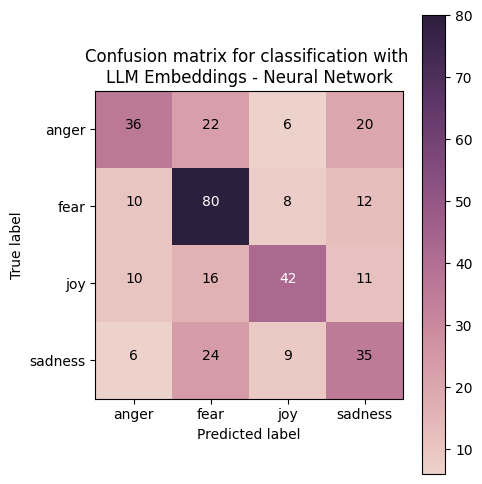

In [ ]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm3 = confusion_matrix(y_true=label_decode(label_encoder, y_test_llama), y_pred=pred_result)
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm3, classes=my_tags, title='Confusion matrix for classification with \nLLM Embeddings - Neural Network')

### ** >>> Exercise 12 (Take home): **

Follow Exercise 6 again and Plot the Training and Validation Accuracy and Loss for the results of this Neural Network. Compare the results of both KNN and the NN we just implemented. Discuss about why we obtained these results with the LLM Embeddings compared to the results of the other models implemented in this Lab.

In [ ]:
# Answer here
sns.lineplot(training_log,x="epoch",y="accuracy",label="train_accuracy")
sns.lineplot(training_log,x="epoch",y="val_accuracy",label="val_accuracy")
plt.legend()
plt.xticks(training_log.index)
plt.show()

sns.lineplot(training_log,x="epoch",y="loss",label="train_loss")
sns.lineplot(training_log,x="epoch",y="val_loss",label="val_loss")
plt.xticks(training_log.index)
plt.legend()
plt.show()

We have three type of model to fit:  
1.Use decision tree with BOW pretrain  
testing accuracy: 0.68    
2.Use KNN with LLM Embeddings  
testing Accuracy: 0.458    
3.Use NN with LLM Embeddings  
testing accuracy: 0.56
It is observed in the figure that as the epoch increases, the val_loss also rises, indicating that the model is experiencing overfitting. This suggests that the LLM Embeddings method is not necessarily more suitable than BOW transform. Additionally, complex models are not always ideal for all datasets; sometimes, simpler models perform better.

### 10.5 Few-Shot Prompting Classification:
Few-shot prompting classification for LLMs involves giving the model a few labeled examples (typically 5 or fewer) within a prompt to guide it in performing a classification task. Instead of needing extensive training, the LLM uses these examples to understand the task and classify new inputs. This approach is significant in current research because it allows LLMs to perform well on tasks with minimal labeled data, reducing the need for large training datasets and making it highly flexible for various NLP tasks, including those in low-resource languages or niche domains.

In this lab exercise, we will explore zero-shot, 1-shot, and 5-shot prompting for classification using an LLM:

- Zero-shot means the model performs classification without seeing any examples beforehand.
- 1-shot provides the model with just one labeled example per class to guide its classification.
- 5-shot gives the model five labeled examples per class to improve its understanding of the task.

Since processing large datasets can be computationally demanding, we will only sample 20 test texts per emotion for the classification task, allowing us to test the model's performance more efficiently without using the entire test set.

**Process order: Explanation Prompt -> Examples + labels (if it is not zero-shot) -> Text to classify**

**Recommendation for the explanation prompt:** Explain to the model that it is a classification model of certain labels, and to only output the label word, and no other explanation. In this case if the model does not follow the instructions we are retrying the same text until it outputs one of the accepted labels for it.

In [ ]:
import ollama
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix

# Define the emotion labels
emotions = ['anger', 'fear', 'joy', 'sadness']
# Define the model to use for few-shot prompting
model_ollama = "llama3.2"

# Function to sample examples per emotion category
def sample_few_shots(df, emotions, num_samples=5):
    few_shot_examples = {}
    for emotion in emotions:
        few_shot_examples[emotion] = df[df['emotion'] == emotion].sample(n=num_samples, random_state=42)
    return few_shot_examples

# Function to build the prompt based on the number of examples (few-shot, 1-shot, zero-shot)
def build_prompt(examples, emotions, num_shots=5):
    classification_instructions = """
You are an emotion classification model. You will be given a text from social media and your task is to classify the text into one of the following emotion categories: anger, fear, joy, or sadness.
You must only output one of these four labels. Do not provide any additional information or explanation. Just output the emotion label as one word.
    """

    prompt = classification_instructions + "\n\n"

    if num_shots > 0:
        prompt += f"Examples: \n"
        for emotion in emotions:
            for _, row in examples[emotion].iterrows():
                prompt += f"Text: {row['text']}\nEmotion: {emotion}\n\n" #Show the examples in the same format it will be shown for the classification text
                if num_shots == 1:  # If 1-shot, break after the first example for each emotion
                    break
    return prompt

# Function to classify using the LLM with retry for incorrect responses
def classify_with_llm(test_text, prompt_base):
    valid_emotions = ['anger', 'fear', 'joy', 'sadness']
    response = None
    while not response or response not in valid_emotions:
        full_prompt = f"{prompt_base}\nClassification:\nText: {test_text}\nEmotion: " #The classification text will leave the emotion label to be filled in by the LLM
        result = ollama.chat(model=model_ollama, messages=[
            {'role': 'user', 'content': full_prompt}
        ])
        response = result['message']['content'].strip().lower()  # Clean and standardize the response
        if response not in valid_emotions:  # Retry if not a valid response
            print(f"Invalid response: {response}. Asking for reclassification.")
    return response

# Main function to run the experiment with the option for zero-shot, 1-shot, or 5-shot prompting
def run_experiment(df_train, df_test, test_samples=5, num_shots=5):
    # Sample examples for few-shot prompting based on num_shots
    if num_shots > 0:
        few_shot_examples = sample_few_shots(df_train, emotions, num_samples=num_shots)
        prompt_base = build_prompt(few_shot_examples, emotions, num_shots=num_shots)
    else:
        prompt_base = build_prompt(None, emotions, num_shots=0)  # Zero-shot has no examples

    # Prepare to classify the test set
    predictions = []
    true_labels = []
    print(prompt_base)
    # Sample 20 examples per emotion for the test set to classify
    test_samples = sample_few_shots(df_test, emotions, num_samples=test_samples)

    # Classify 20 test examples (5 from each category) and save predictions
    for emotion in emotions:
        for _, test_row in test_samples[emotion].iterrows():
            test_text = test_row['text']
            predicted_emotion = classify_with_llm(test_text, prompt_base)
            predictions.append(predicted_emotion)
            true_labels.append(emotion)

    # Calculate accuracy
    accuracy = accuracy_score(true_labels, predictions)
    print(f"Accuracy: {accuracy * 100:.2f}%")

    # Classification report
    print(classification_report(y_true=true_labels, y_pred=predictions))

    # Plot confusion matrix
    cm = confusion_matrix(y_true=true_labels, y_pred=predictions)
    my_tags = ['anger', 'fear', 'joy', 'sadness']
    plot_confusion_matrix(cm, classes=my_tags, title=f'Confusion matrix for classification with \n{num_shots}-shot prompting')


You are an emotion classification model. You will be given a text from social media and your task is to classify the text into one of the following emotion categories: anger, fear, joy, or sadness.
You must only output one of these four labels. Do not provide any additional information or explanation. Just output the emotion label as one word.
    


Invalid response: frustration. Asking for reclassification.
Accuracy: 43.75%
              precision    recall  f1-score   support

       anger       0.43      0.60      0.50        20
        fear       0.00      0.00      0.00        20
         joy       0.41      0.70      0.52        20
     sadness       0.60      0.45      0.51        20

    accuracy                           0.44        80
   macro avg       0.36      0.44      0.38        80
weighted avg       0.36      0.44      0.38        80



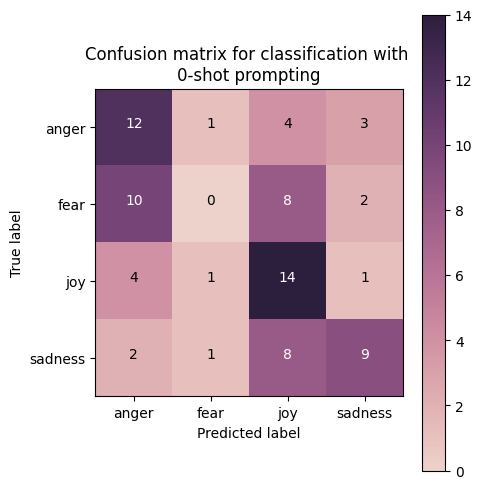

In [ ]:
# Example of running the experiment with zero-shot prompting
run_experiment(df_train, df_test, test_samples=20, num_shots=0)


You are an emotion classification model. You will be given a text from social media and your task is to classify the text into one of the following emotion categories: anger, fear, joy, or sadness.
You must only output one of these four labels. Do not provide any additional information or explanation. Just output the emotion label as one word.
    

Examples: 
Text: Candace &amp; her pout are getting right on my tits #GBBO
Emotion: anger

Text: okay i AHVE to start mob psycho 100 today. if i dont im going to fight myself
Emotion: fear

Text: @BbeautifulSoul_ u always gotta attitude tho ... 😕 cheer up
Emotion: joy

Text: @happyandbashful Flirt, simper, pout, repeat. Yuck.
Emotion: sadness


Accuracy: 46.25%
              precision    recall  f1-score   support

       anger       0.40      0.70      0.51        20
        fear       1.00      0.05      0.10        20
         joy       0.44      0.75      0.56        20
     sadness       0.70      0.35      0.47        20

    accurac

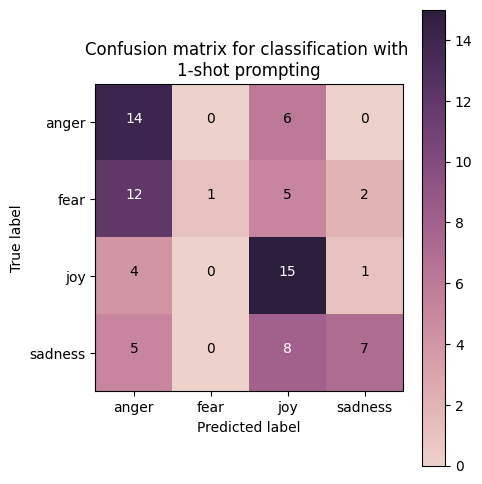

In [ ]:
# Example of running the experiment with 1-shot prompting
run_experiment(df_train, df_test, test_samples=20, num_shots=1)


You are an emotion classification model. You will be given a text from social media and your task is to classify the text into one of the following emotion categories: anger, fear, joy, or sadness.
You must only output one of these four labels. Do not provide any additional information or explanation. Just output the emotion label as one word.
    

Examples: 
Text: Candace &amp; her pout are getting right on my tits #GBBO
Emotion: anger

Text: @josephperson Cam is still rattled from the backlash he received when he made the black QB comment and suffered the wrath of White America.
Emotion: anger

Text: When someone rudely says all women should have long hair and your inner feminist tries not to rage
Emotion: anger

Text: SOMEONE LET SNAKES IN MY HOUSE, I BET IT @Ya_Boi_Huck I KILL THAT BUGGER WHEN I GET MY HANDS ON HIM #rage #HuckFP2
Emotion: anger

Text: Who got madden 17 or 2k17 ps4 add TrackdawgT lets run it
Emotion: anger

Text: okay i AHVE to start mob psycho 100 today. if i don

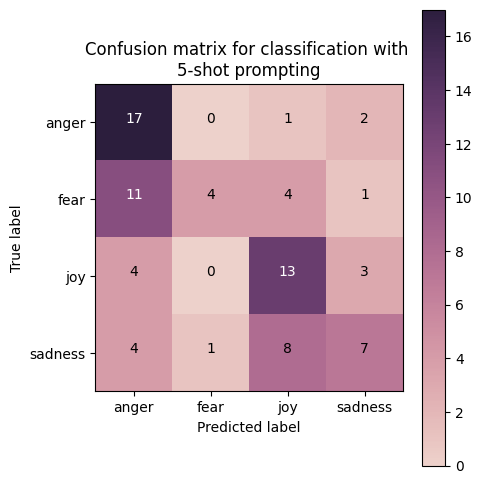

In [ ]:
# Example of running the experiment with 5-shot prompting
run_experiment(df_train, df_test, test_samples=20, num_shots=5)

### ** >>> Exercise 13 (Take home): **

Compare and discuss the results of the zero-shot, 1-shot and 5-shot classification.

# Answer here
We use n-shot classification to help us achieve accurate classifications. If n getting larger, the model will response more accurate. But it cost more computing source and time. So if we want this model reply a general question, using 0-shot is a better way than 5-shot. If we want know a specific field, using 5-shot is a better choice than 0-shot.

### 10.6 Extra LLM Materials:
So this will be it for the lab, but here are some extra materials if you would like to explore:
- How to use Gemini's LLM API from Google: [Gemini Collab](https://colab.research.google.com/github/google/generative-ai-docs/blob/main/site/en/gemini-api/docs/get-started/python.ipynb?fbclid=IwZXh0bgNhZW0CMTEAAR0-gg7cDIuaGfkeN5U3rusSNKj2jj7bIsL45sZWaM0NbTE7BSNtfzBeEGE_aem_yT5wAuL_G5E21iuuCYJXwA#scrollTo=hskqSKnJUHvp) (Free with some restrictions to the requests per minute.

- How to use OpenAI ChatGPT model's API (Not Free API): [Basics Video](https://www.youtube.com/watch?v=e9P7FLi5Zy8), [Basics GitHub](https://github.com/gkamradt/langchain-tutorials/blob/main/chatapi/ChatAPI%20%2B%20LangChain%20Basics.ipynb), [RAG's Basics Video](https://www.youtube.com/watch?v=9AXP7tCI9PI&t=300s), [RAG's Basics GitHub](https://github.com/techleadhd/chatgpt-retrieval)

- **Advanced topic - QLoRA (Quantized Low-Rank Adapter):** QLoRA is a method used to make fine-tuning large language models more efficient. It works by adding a small, trainable part (LoRA) to a pre-trained model, while keeping the rest of the model frozen. At the same time, it reduces the size of the model’s data using a process called quantization, which makes the model require less memory. This allows you to fine-tune large models without needing as much computational power, making it easier to adapt models for specific tasks. Materials: [Paper GitHub](https://github.com/artidoro/qlora?tab=readme-ov-file), [Llama 3 Application Video](https://www.youtube.com/watch?v=YJNbgusTSF0&t=512s),[Llama 3 Application GitHub](https://github.com/adidror005/youtube-videos/blob/main/LLAMA_3_Fine_Tuning_for_Sequence_Classification_Actual_Video.ipynb)

---